<a href="https://colab.research.google.com/github/Anirudhakumar/DS-/blob/master/Credit_card_fraud_detection_Starter_code%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.simplefilter("ignore")

from sklearn import metrics
import sklearn
import statsmodels.api as sm

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [39]:
# Set ipython's max row display
pd.set_option('display.max_row', 500)

# Set iPython's max column width to 100
pd.set_option('display.max_columns', 100)

In [40]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory data analysis

In [41]:
#cd C:\Users\hp\Documents\Python Scripts\Assignment - capstone

In [42]:
#path=r'C:\Users\hp\Documents\Python Scripts\Assignment - capstone'

In [43]:
# Read the file
df = pd.read_csv('./drive/My Drive/creditcard.csv')

In [44]:
#df = pd.read_csv(path+'\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
df.shape

(284807, 31)

Here we will observe the distribution of our classes

In [48]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('normal_share :-',normal_share)
print('fraud_share :-',fraud_share)

normal_share :- 99.82725143693798
fraud_share :- 0.1727485630620034


Data is highly unbalanced and need balancing techniqure for better results

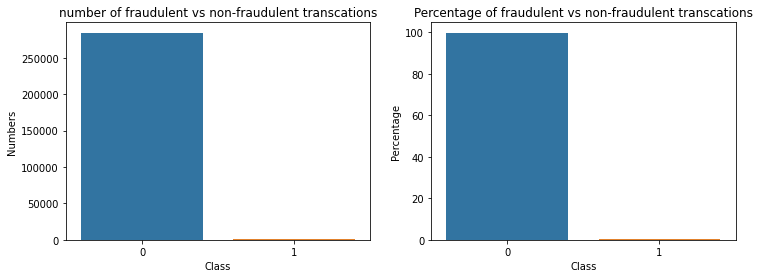

In [49]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

#sns.barplot(x='Product_Category', y='Sales', data=df)
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title("number of fraudulent vs non-fraudulent transcations")
sns.countplot(x="Class", data=df)
plt.xlabel("Class")
plt.ylabel("Numbers")


plt.subplot(122)
plt.title("Percentage of fraudulent vs non-fraudulent transcations")
sns.barplot(x="Class", y="Class", data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.show()




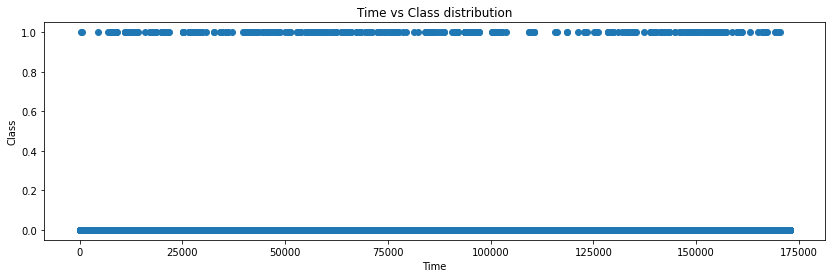

In [50]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(14,4))
plt.title("Time vs Class distribution")
plt.scatter(df['Time'], df['Class'])
plt.xlabel("Time")
plt.ylabel("Class")
plt.show()

Frauds are happening all hours of day but from 11:00(30000 sec) to 23:00(80000 sec) frauds are high while in night hours frauds are comparatively less. 
Valid transactions are happening all hours of day.

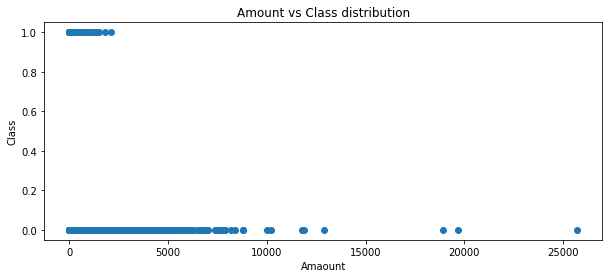

In [51]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,4))
plt.title("Amount vs Class distribution")
plt.scatter(df['Amount'], df['Class'])
plt.xlabel("Amaount")
plt.ylabel("Class")
plt.show()


Frauds are happening for less amount ie bellow 4000. 
Transaction more than amount 10000 are valid and not having any frauds. suspecting outliers and can be removed

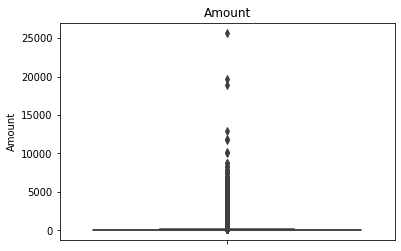

In [52]:
# Boxplot for Amount

sns.boxplot(y=df['Amount'])
plt.title('Amount')

plt.show()


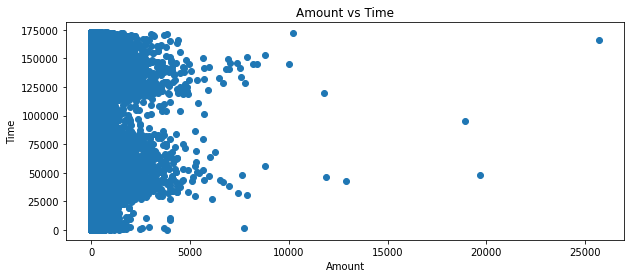

In [53]:
plt.figure(figsize=(10,4))
plt.title("Amount vs Time")
plt.scatter(df['Amount'], df['Time'])
plt.xlabel("Amount")
plt.ylabel("Time")
plt.show()

In [54]:
# removing outliers by Amount>8000

df1 = df.loc[df['Amount'] < 8000]

In [55]:
#
print(df1.shape)
print(df.shape)


(284795, 31)
(284807, 31)


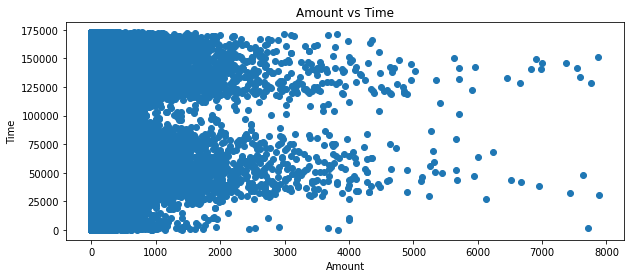

In [56]:
plt.figure(figsize=(10,4))
plt.title("Amount vs Time")
plt.scatter(df1['Amount'], df1['Time'])
plt.xlabel("Amount")
plt.ylabel("Time")
plt.show()

In [57]:
# copying database

df2 = df1.copy()

### Splitting the data into train & test data

In [58]:
# Putting response variable to y

y= df2['Class']#class variable

y.shape

(284795,)

In [59]:
# Putting feature variable to X
X = df2.drop(['Class'], axis=1)

X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [60]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [61]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [62]:
#printing total number of fraud transaction and their distribution in test set and train set
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
347
145


### Plotting the distribution of a variable

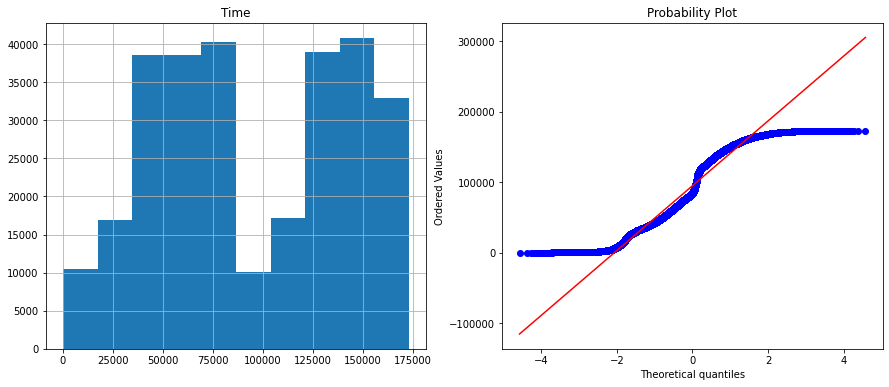

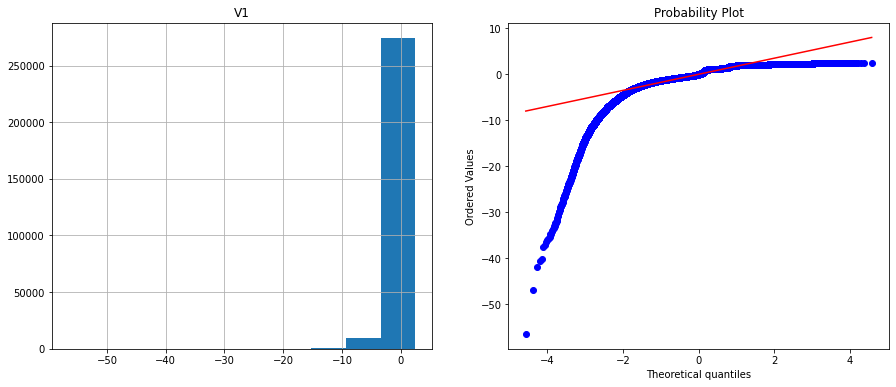

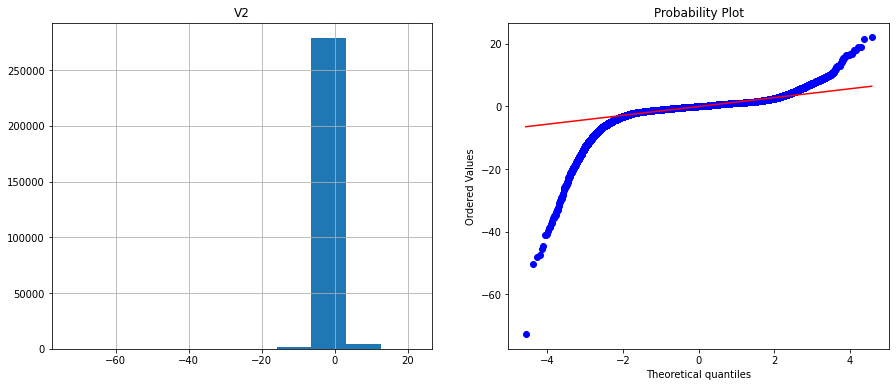

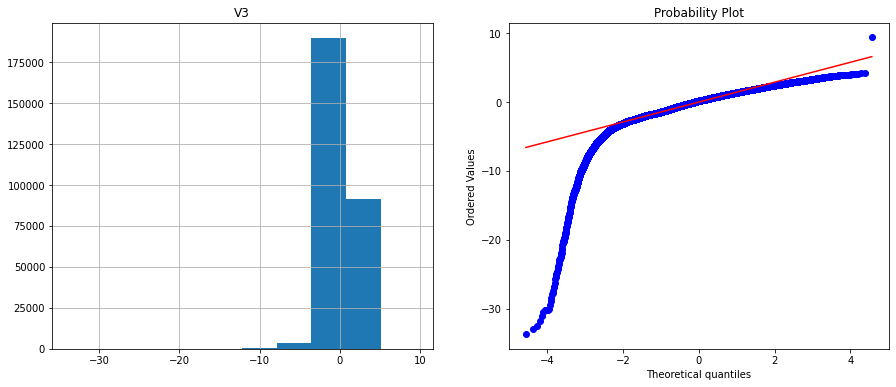

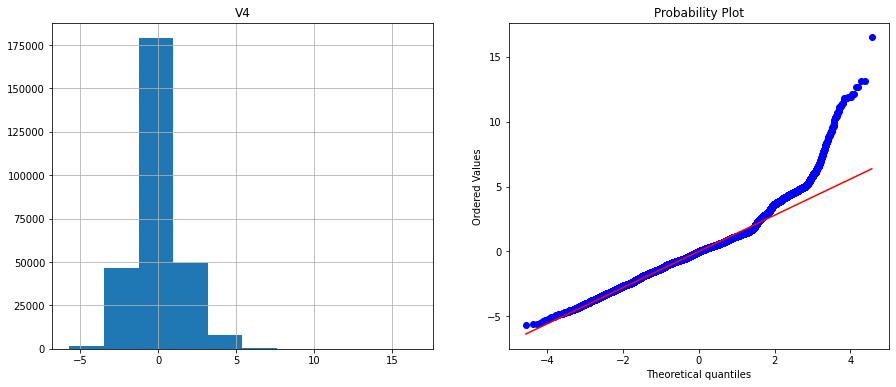

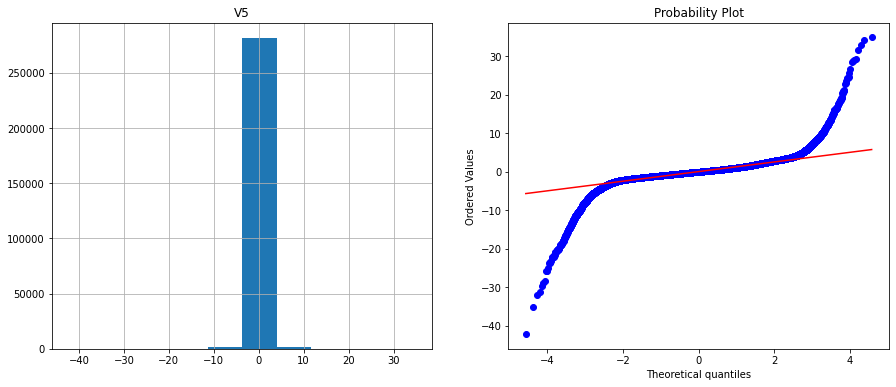

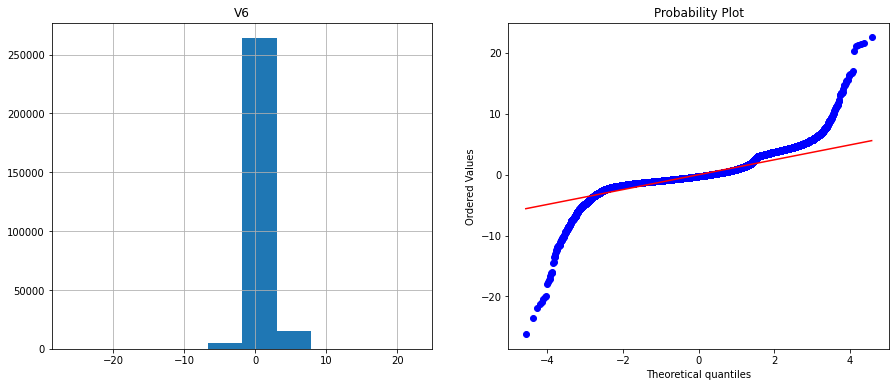

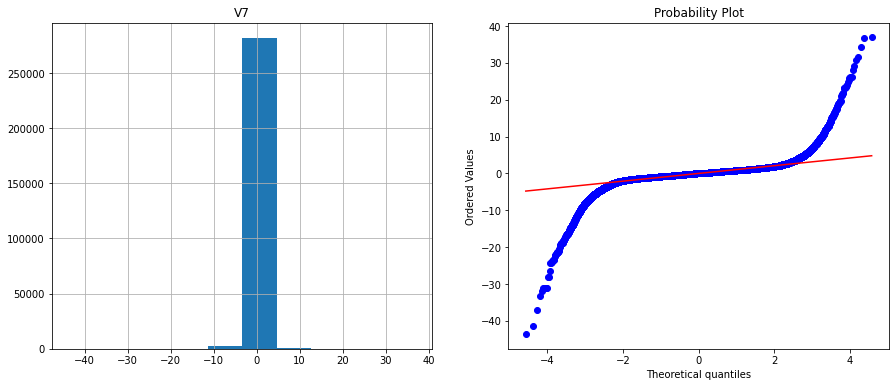

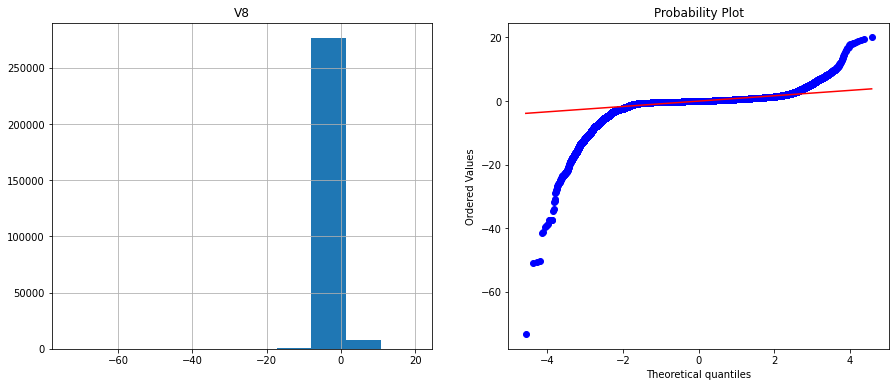

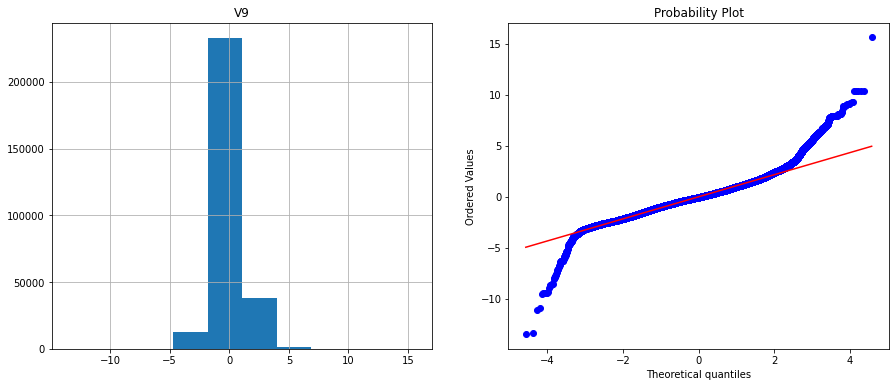

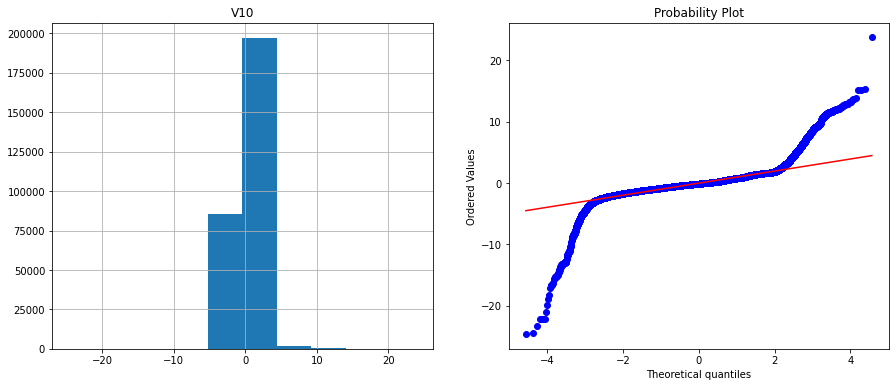

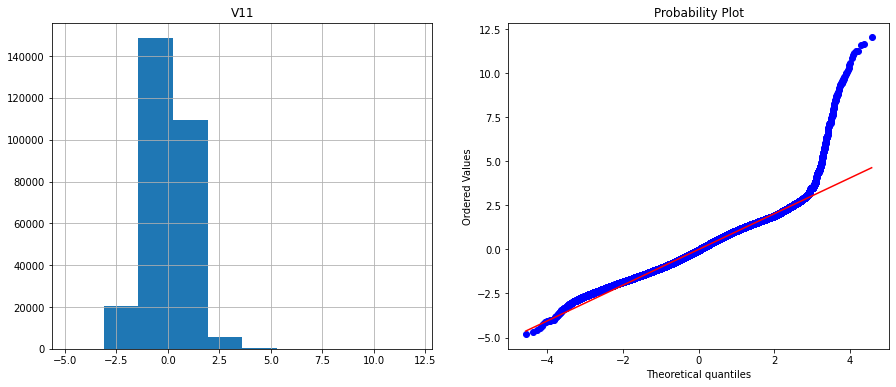

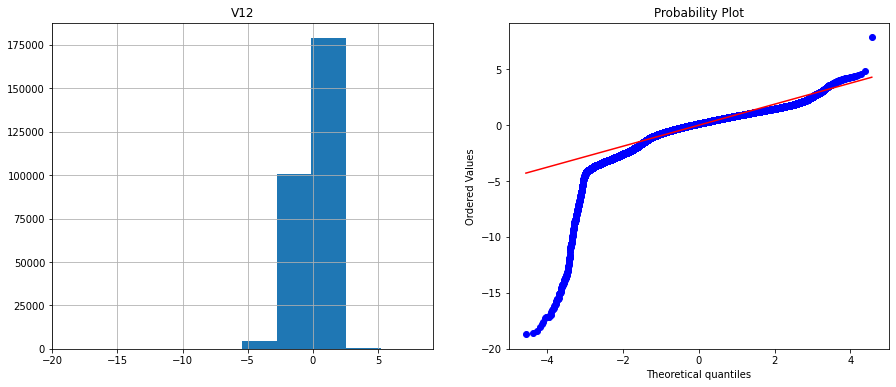

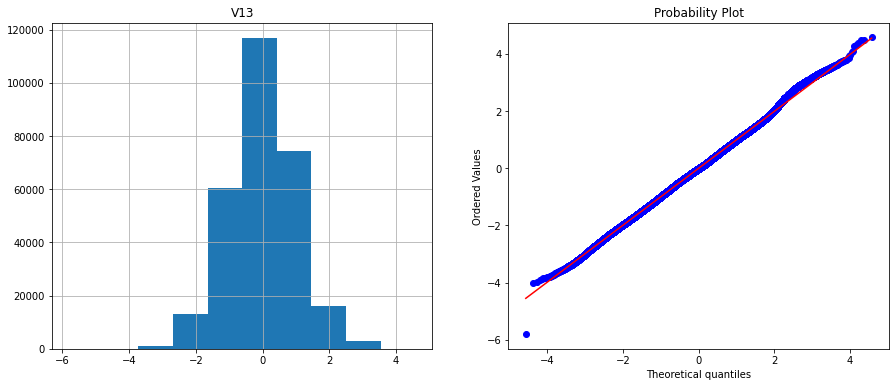

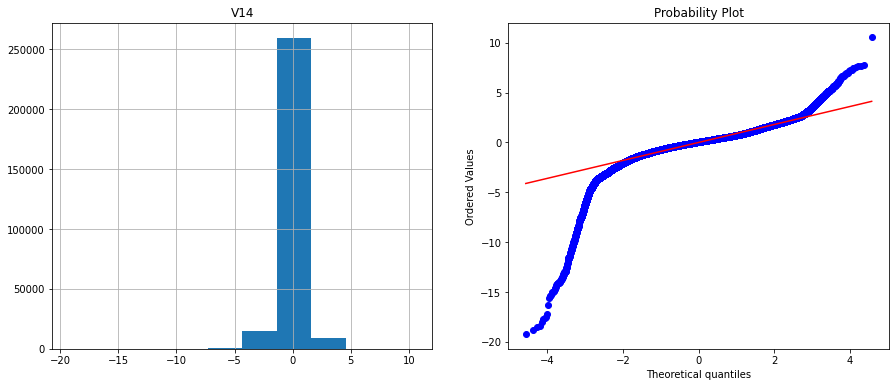

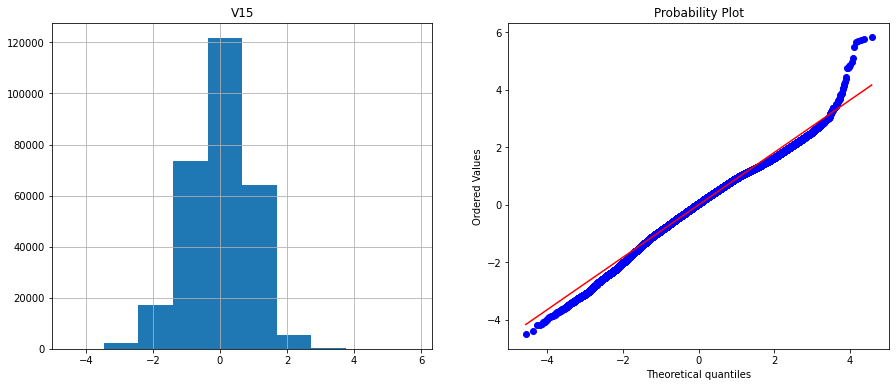

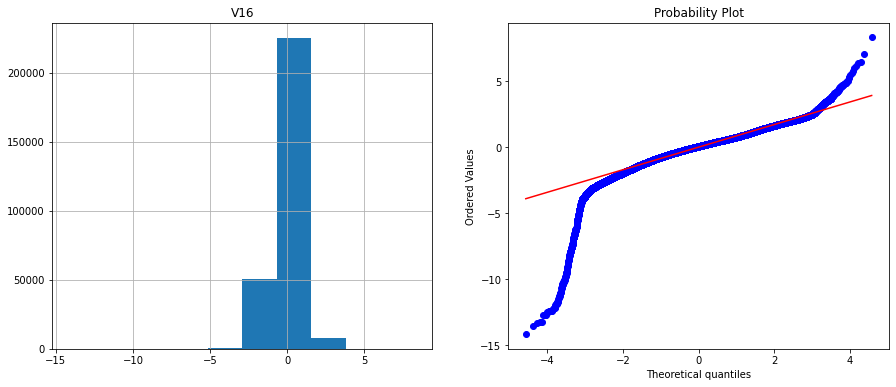

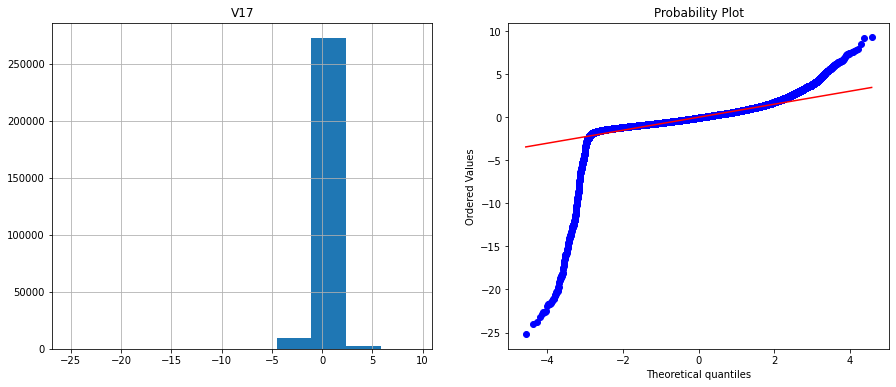

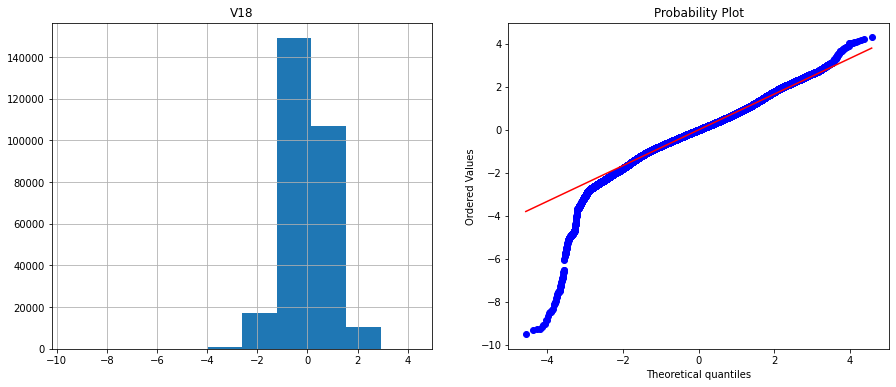

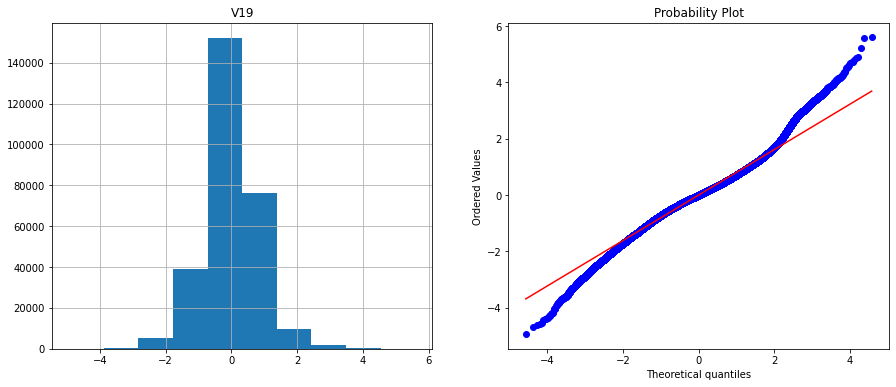

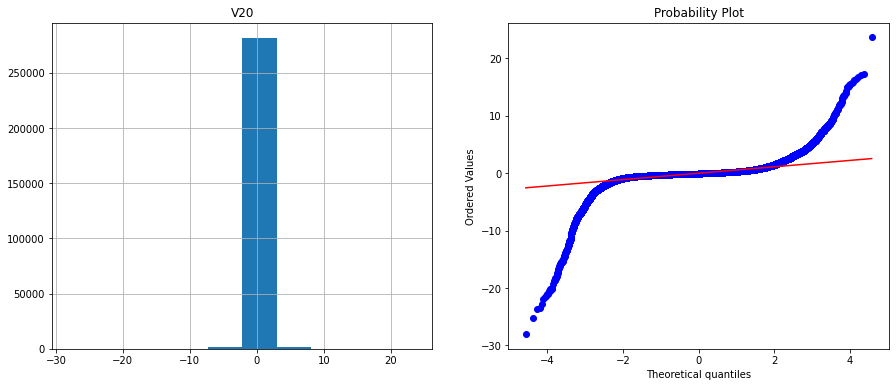

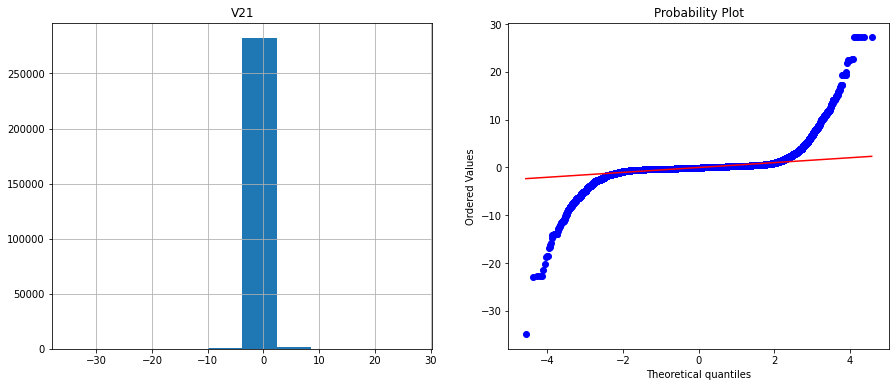

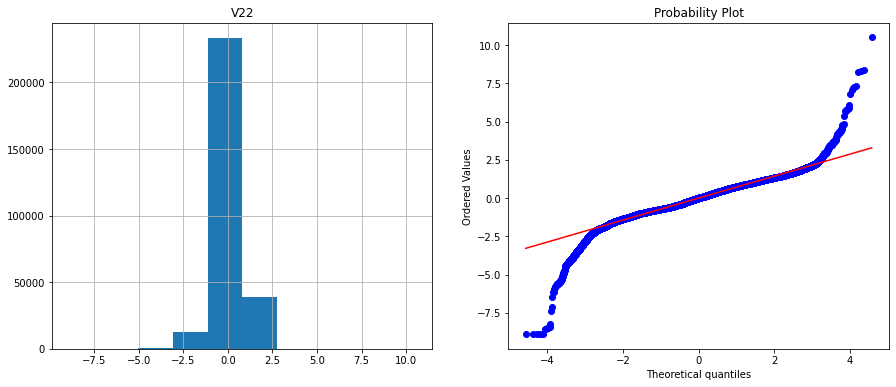

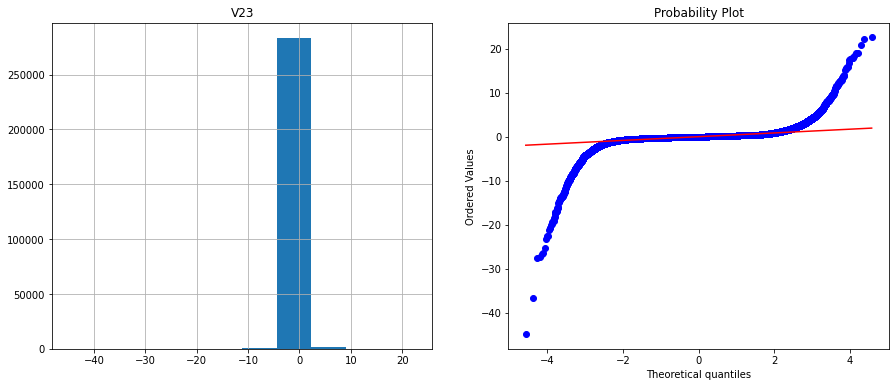

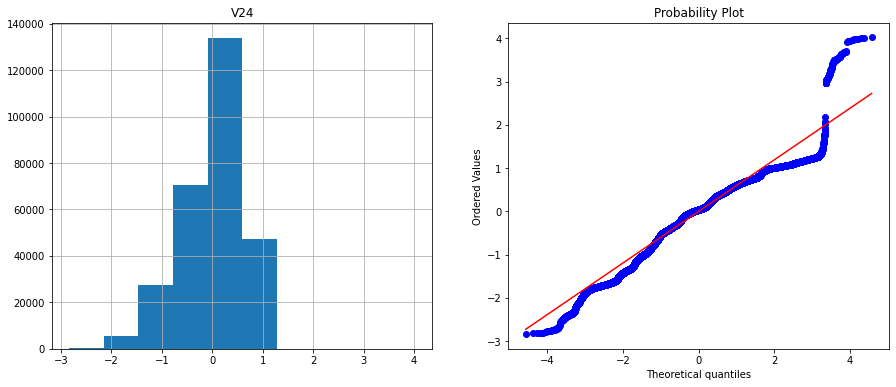

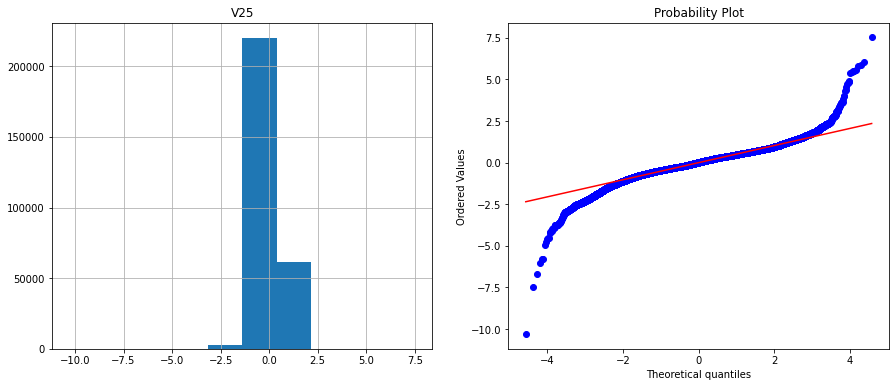

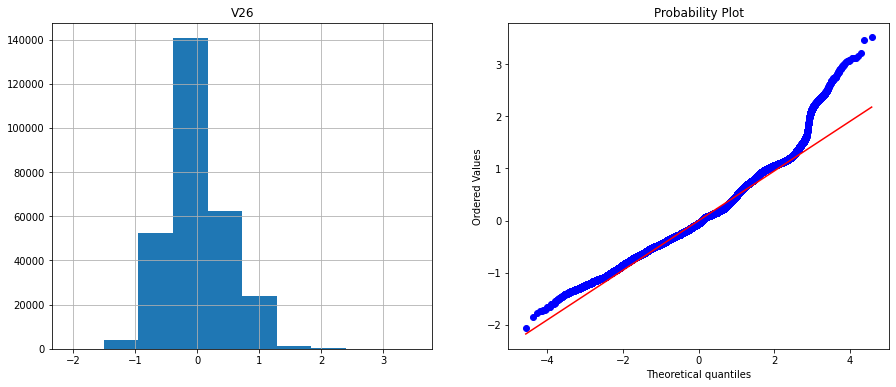

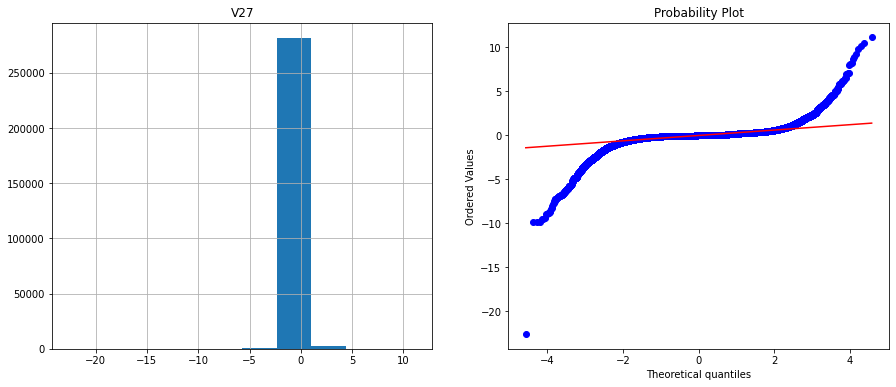

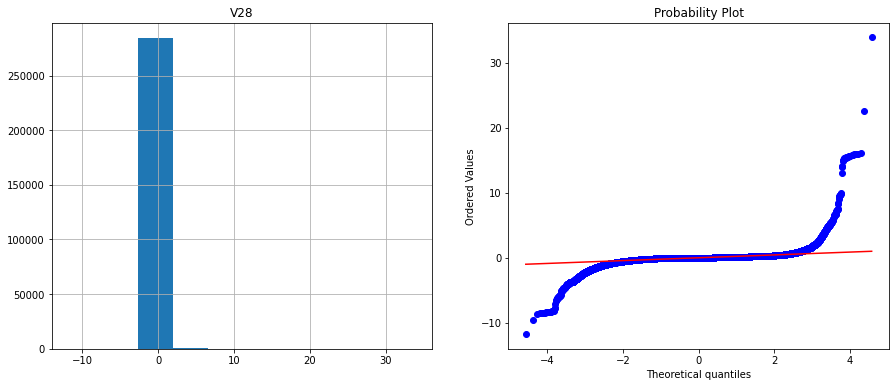

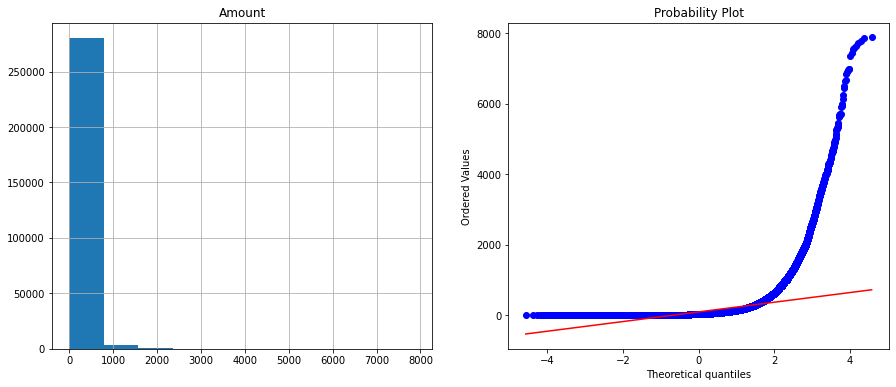

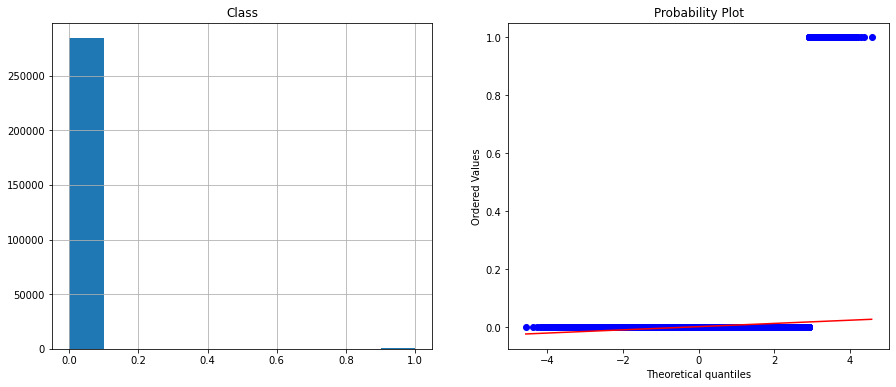

In [63]:
# plot the histogram of a variable from the dataset to see the skewness


def show_histplot (dff, col_name):
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(col_name)
        dff[col_name].hist()

        plt.subplot(1,2,2)
        stats.probplot(df2[col_name],dist="norm", plot=plt)

    
for i in df2.columns:
    show_histplot(df2,i)


From the above graphs we can see skewness is present in the data.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [64]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [65]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [66]:
df_X_train_pt = pd.DataFrame(X_train_pt,columns=X_test.columns)
df_X_test_pt = pd.DataFrame(X_test_pt,columns=X_test.columns)

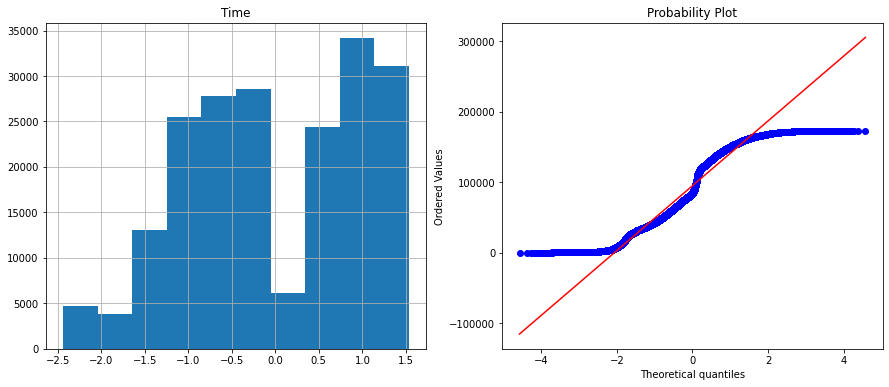

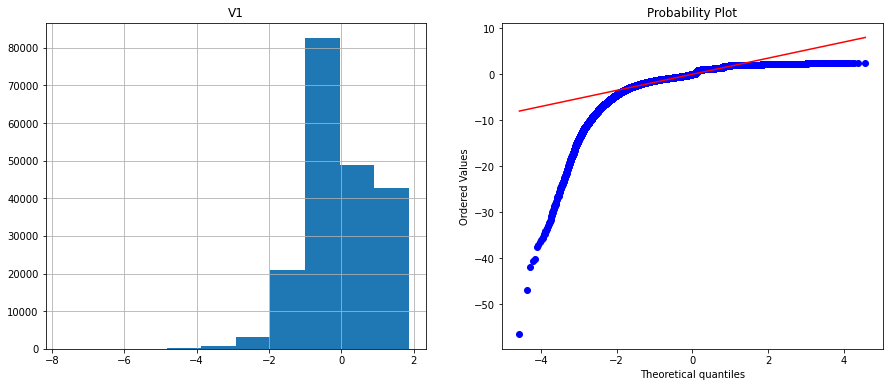

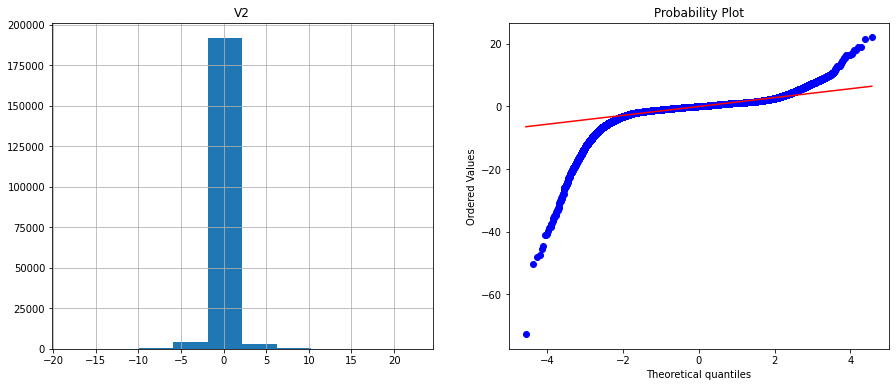

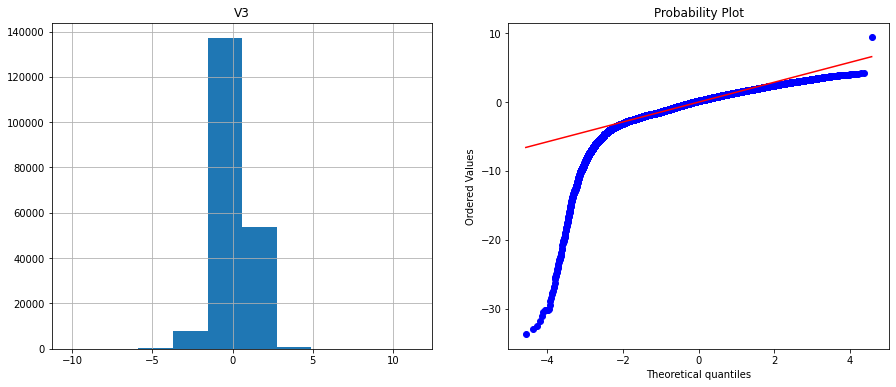

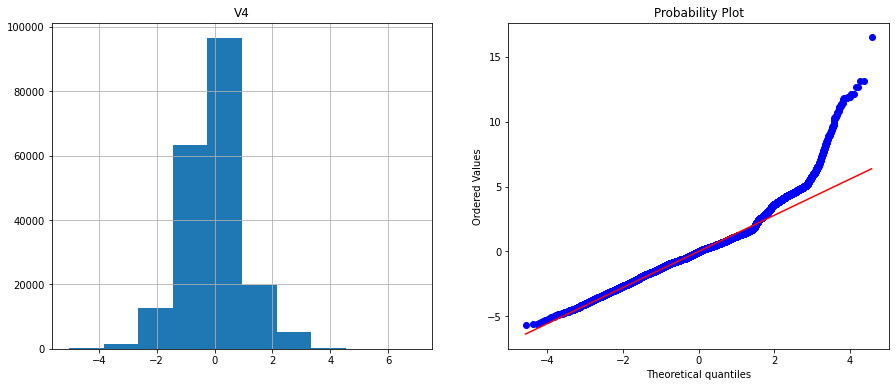

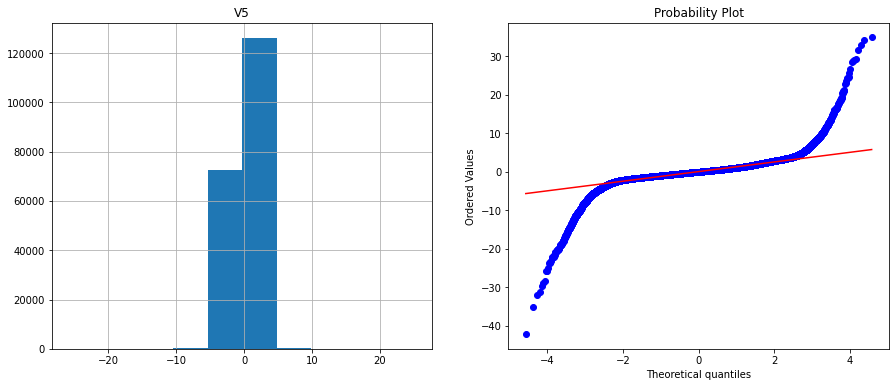

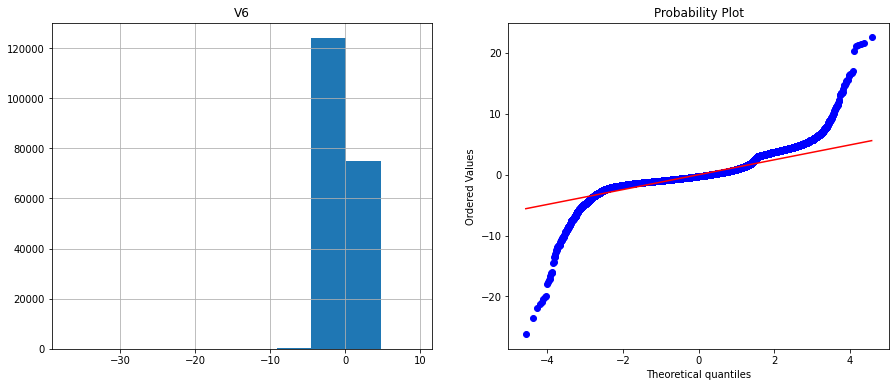

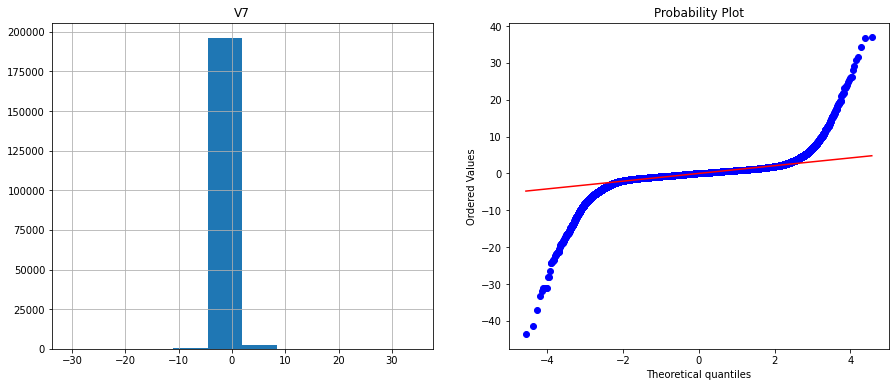

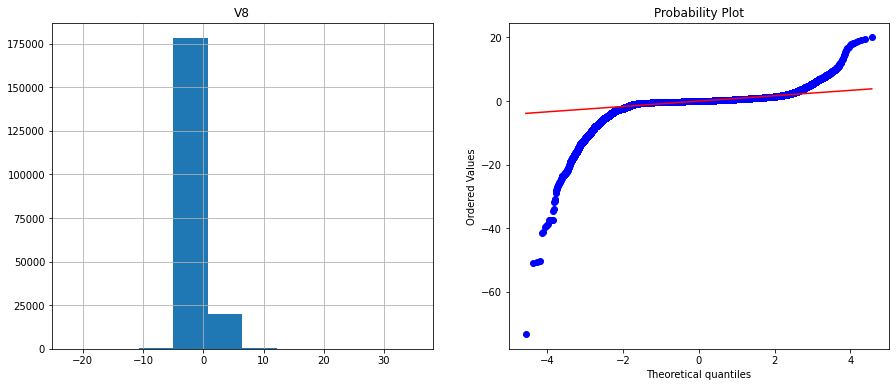

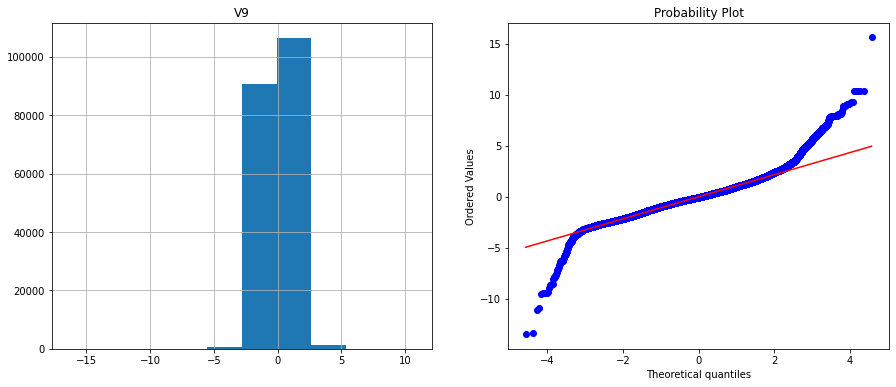

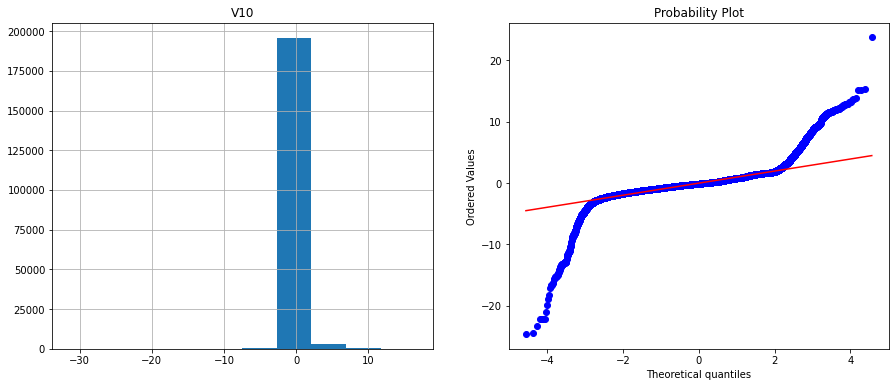

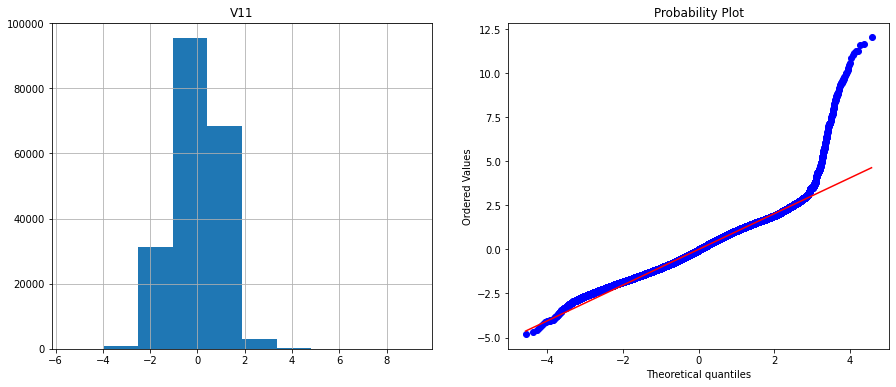

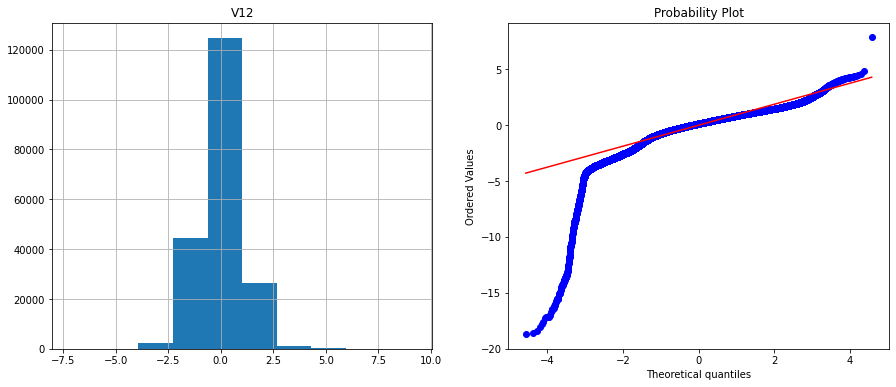

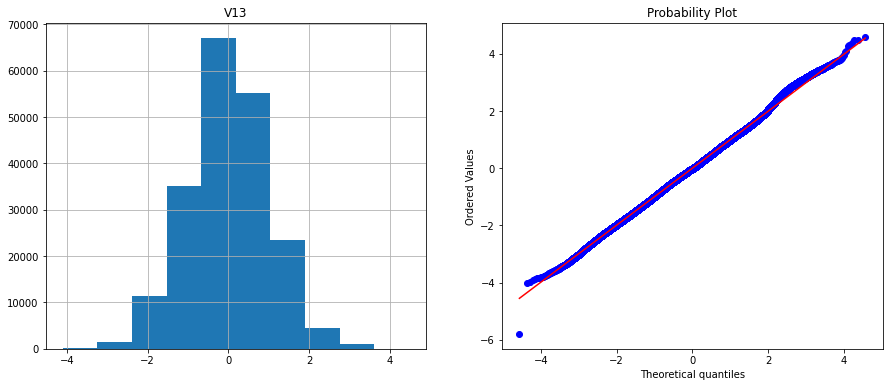

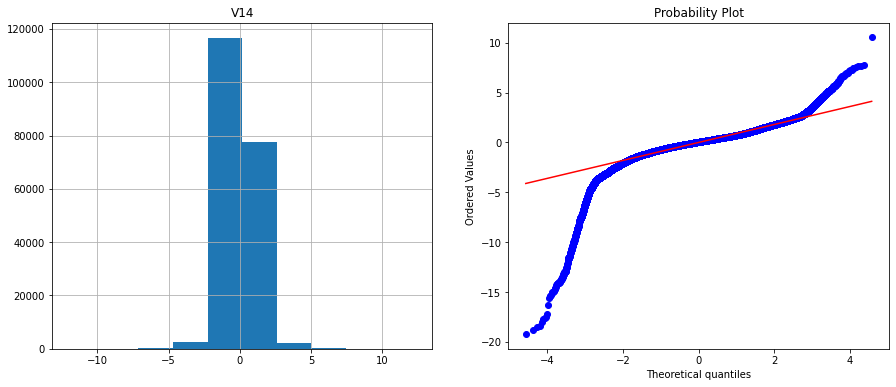

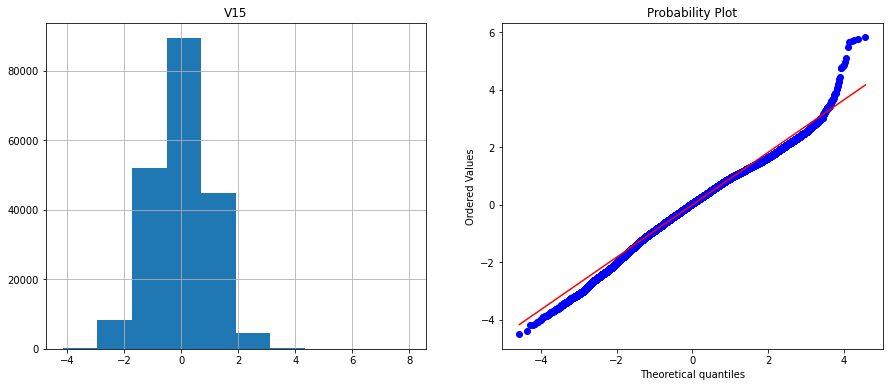

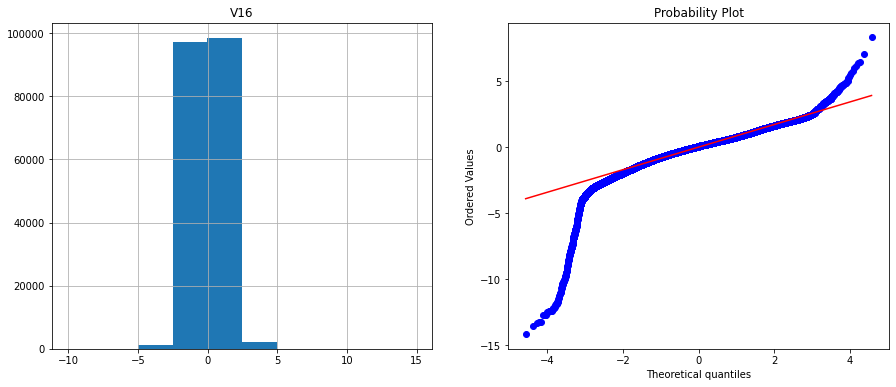

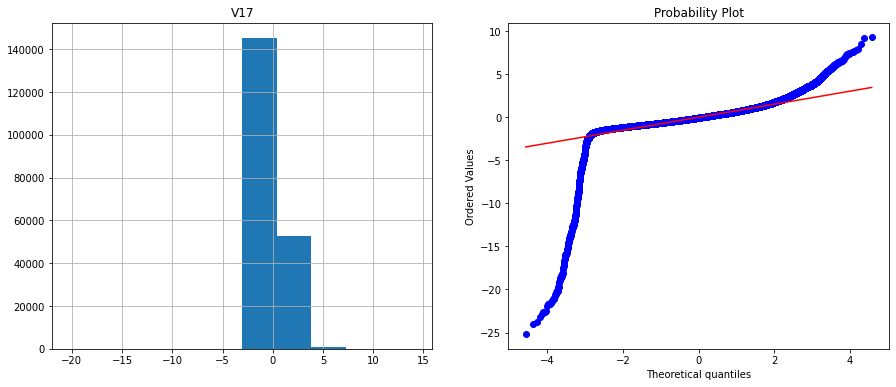

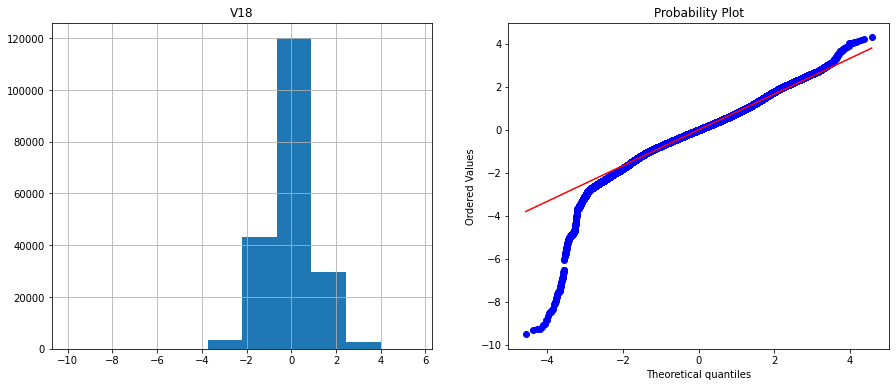

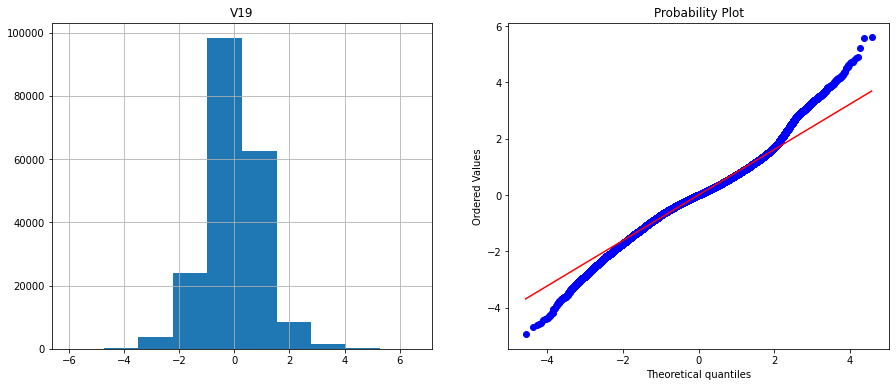

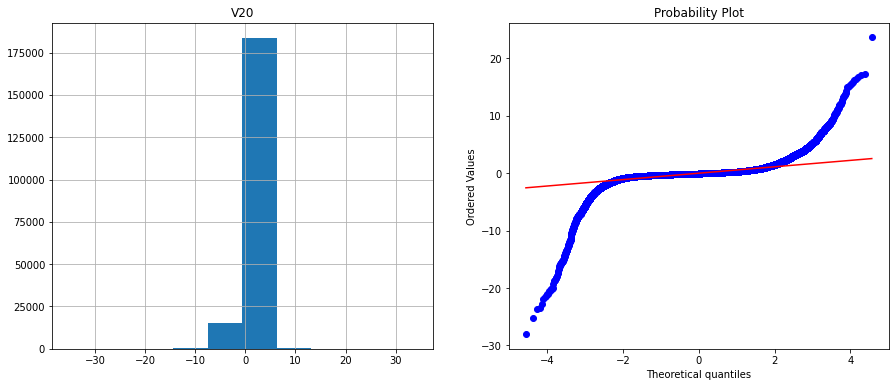

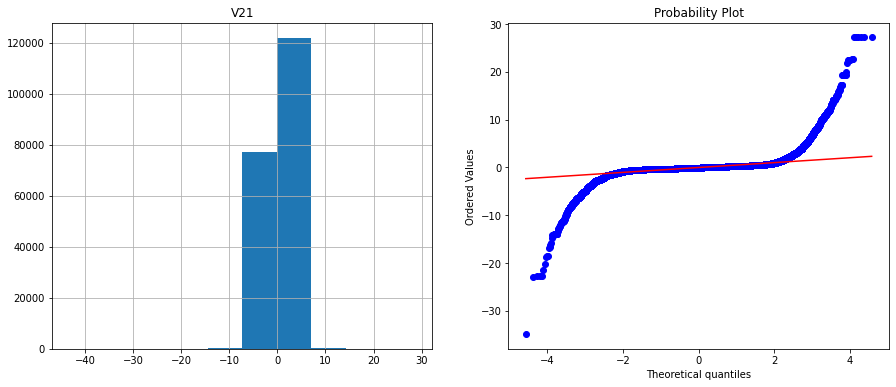

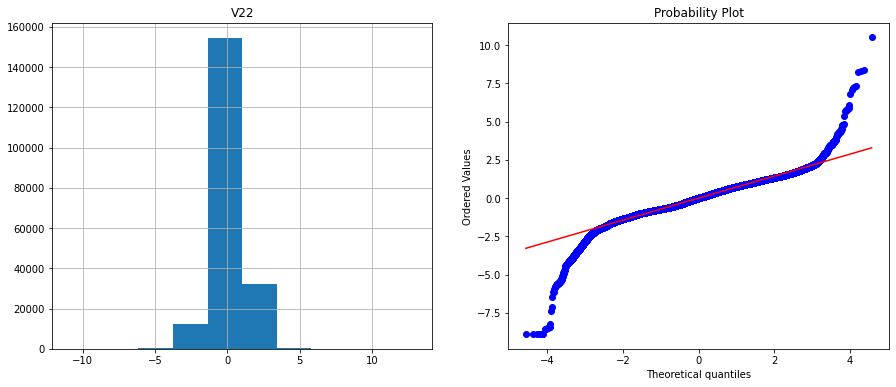

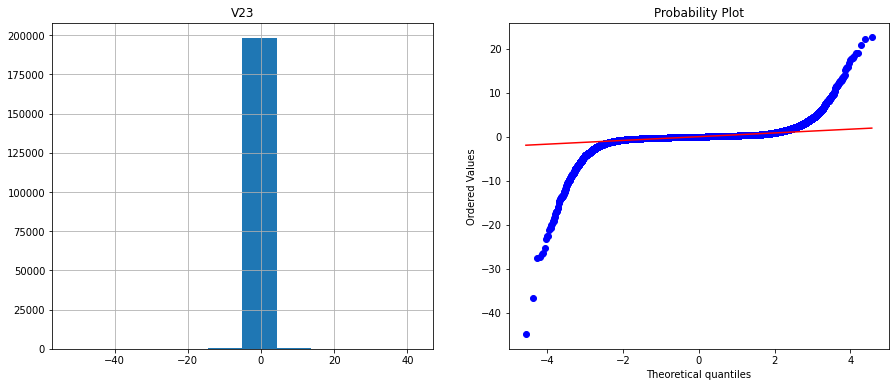

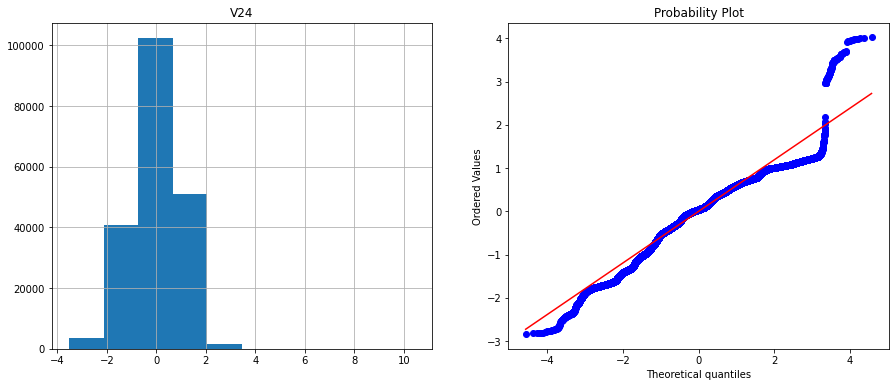

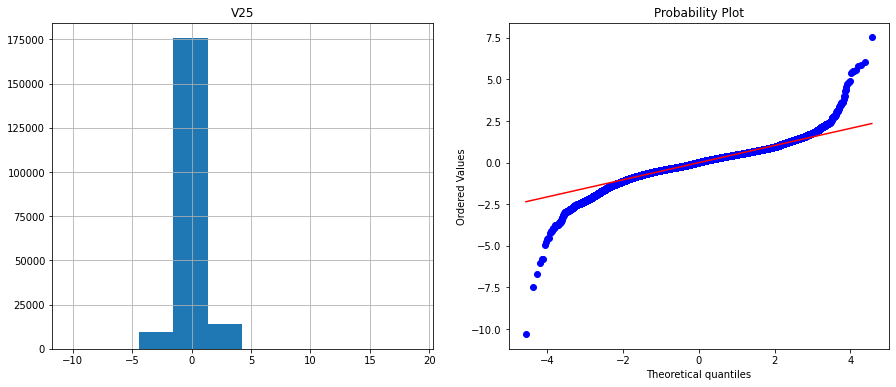

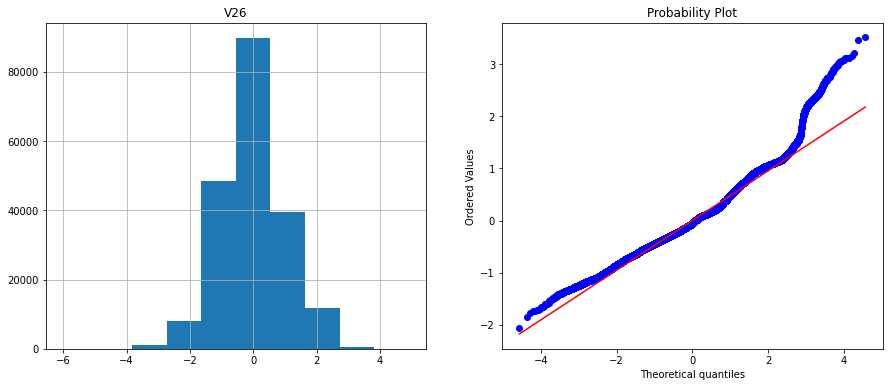

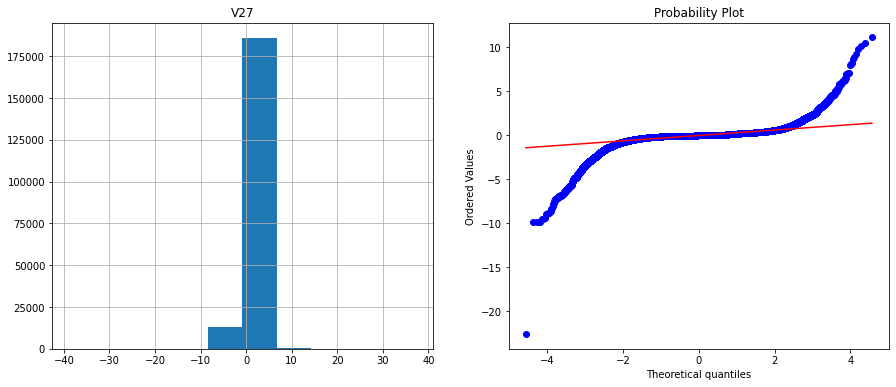

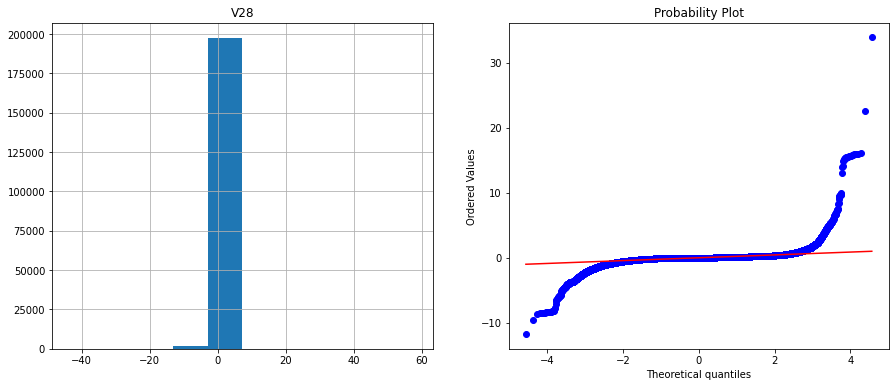

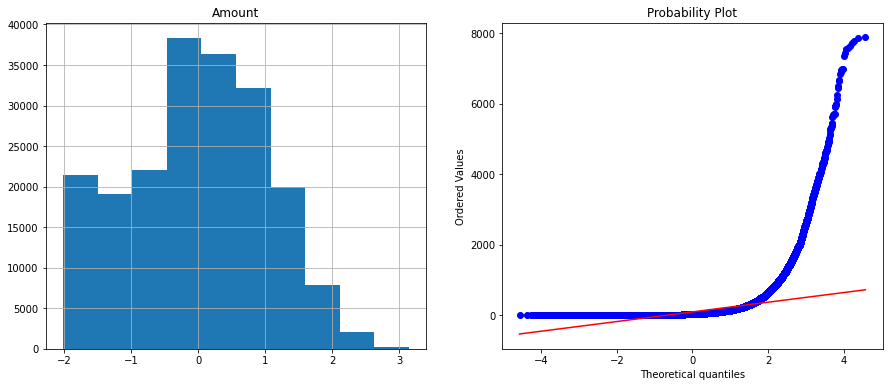

In [67]:
# plot the histogram of a variable from the dataset again to see the result 
for i in df_X_train_pt.columns:
    show_histplot(df_X_train_pt,i)

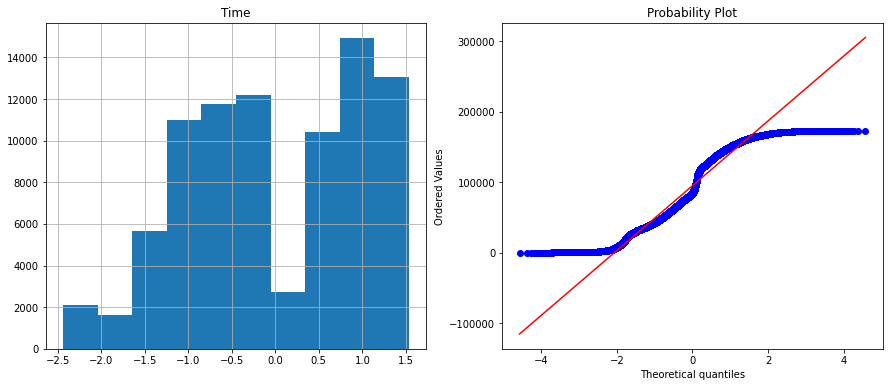

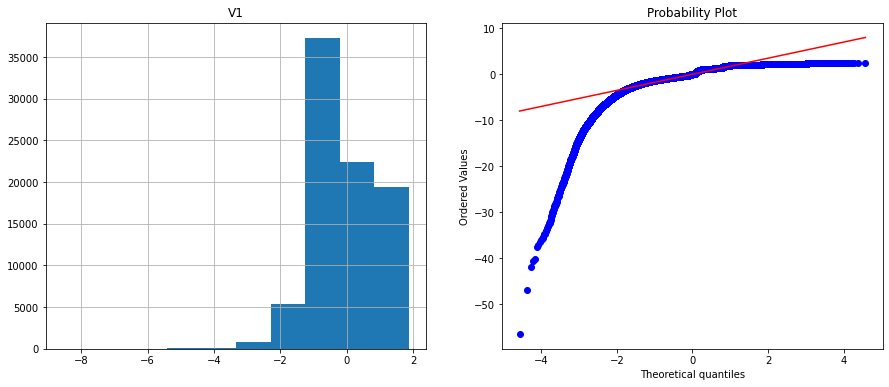

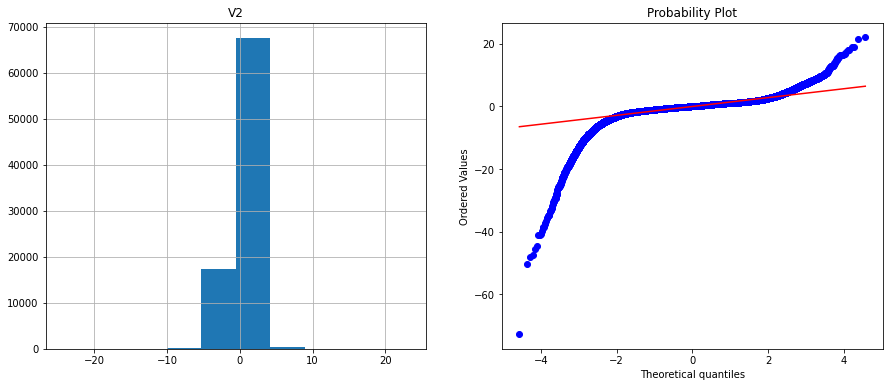

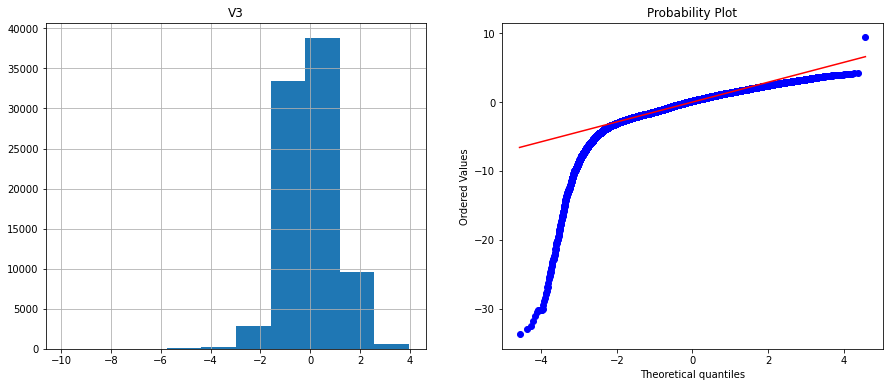

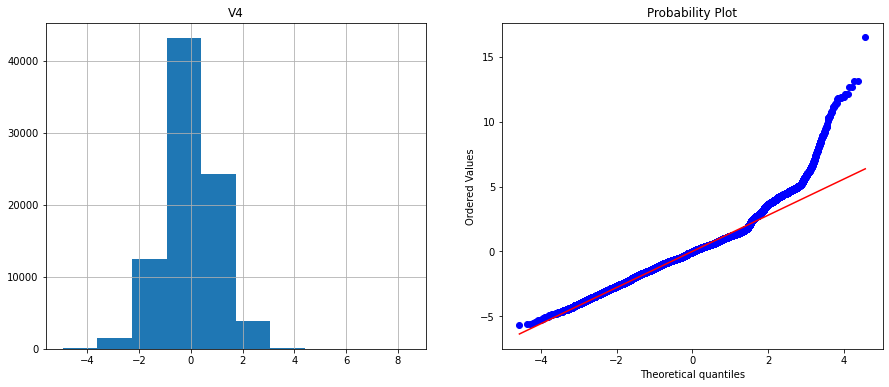

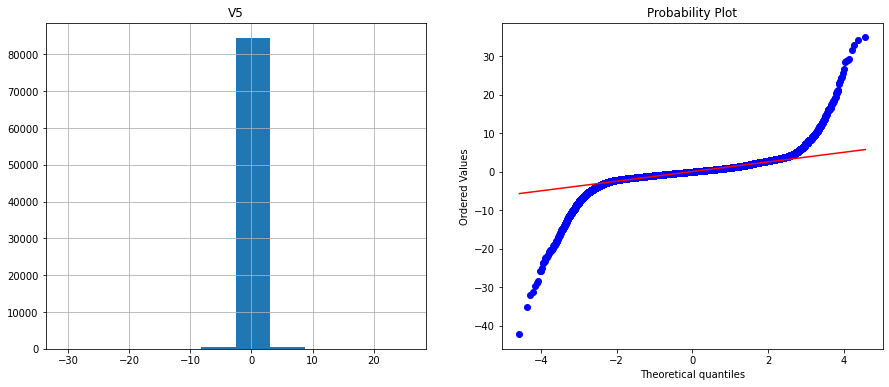

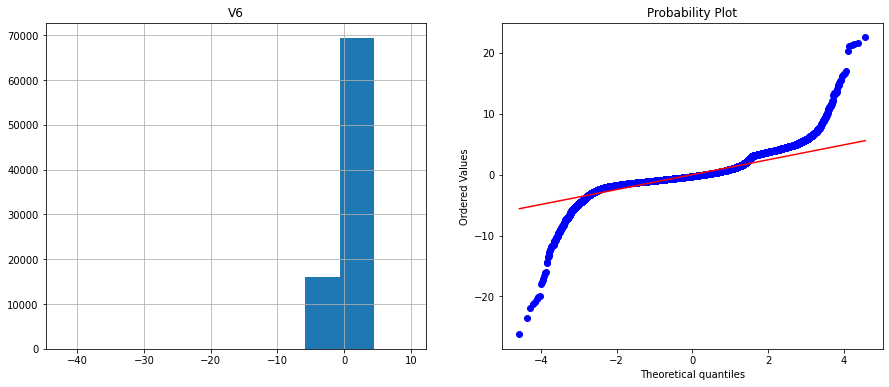

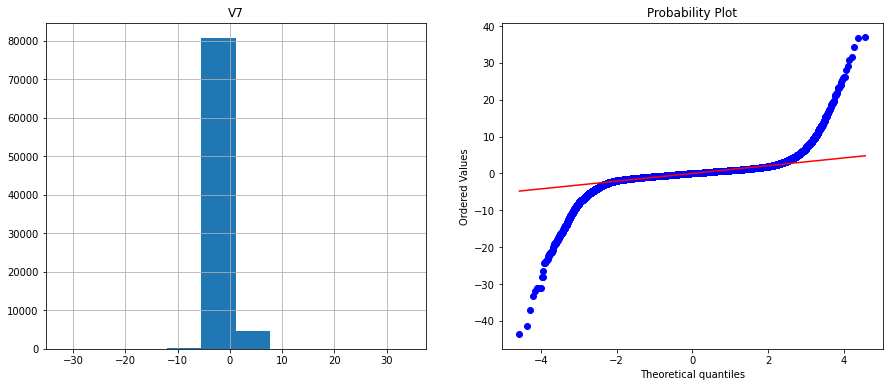

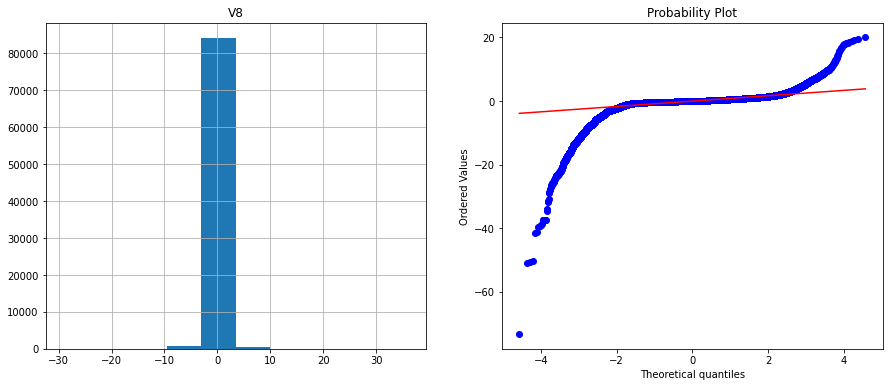

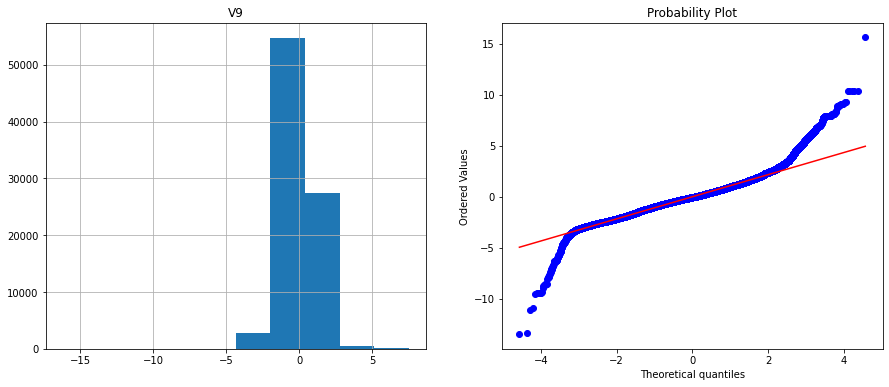

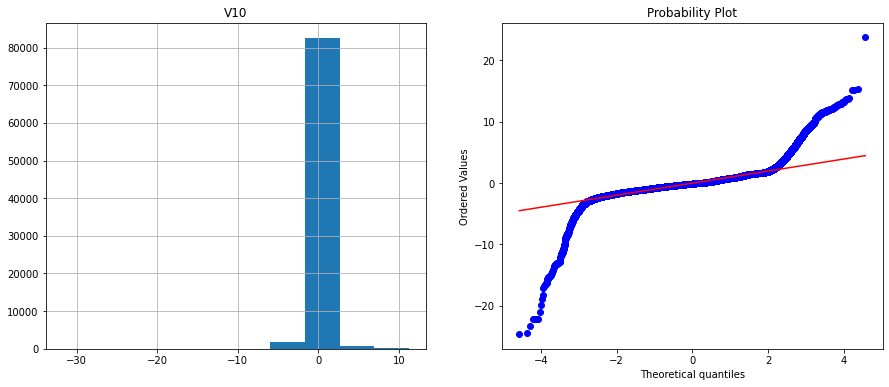

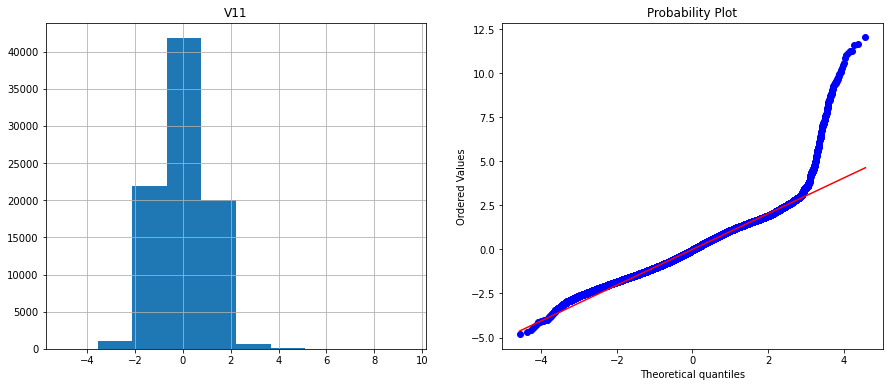

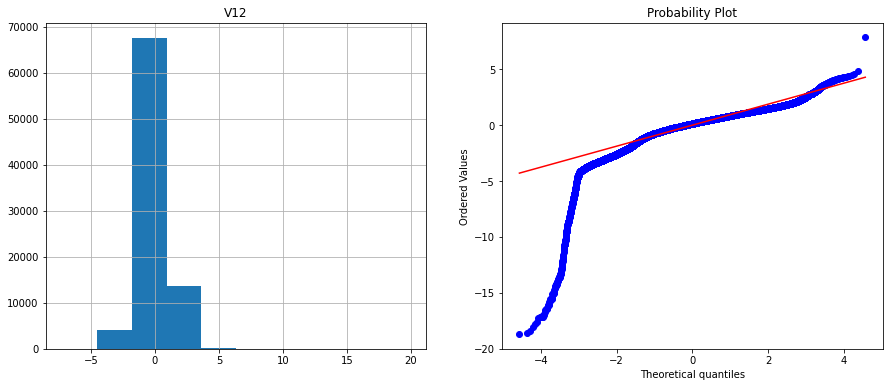

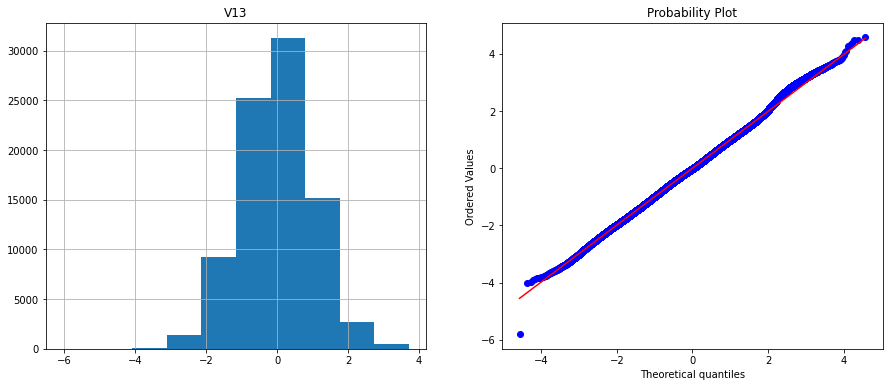

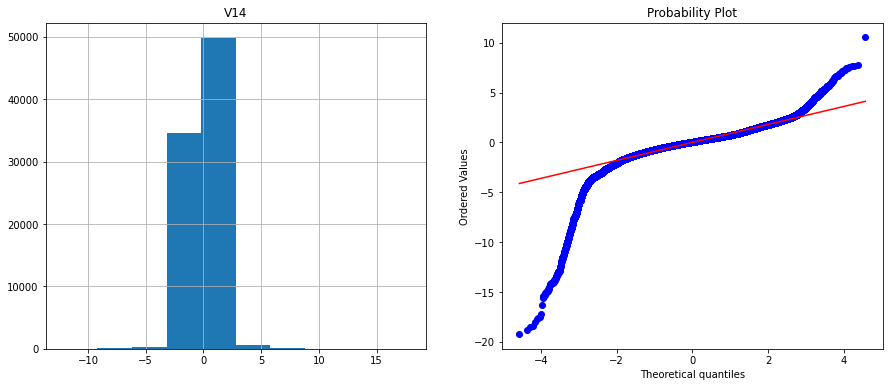

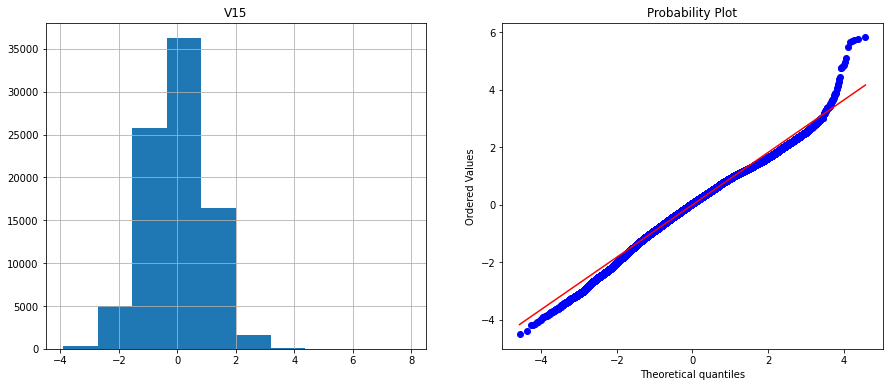

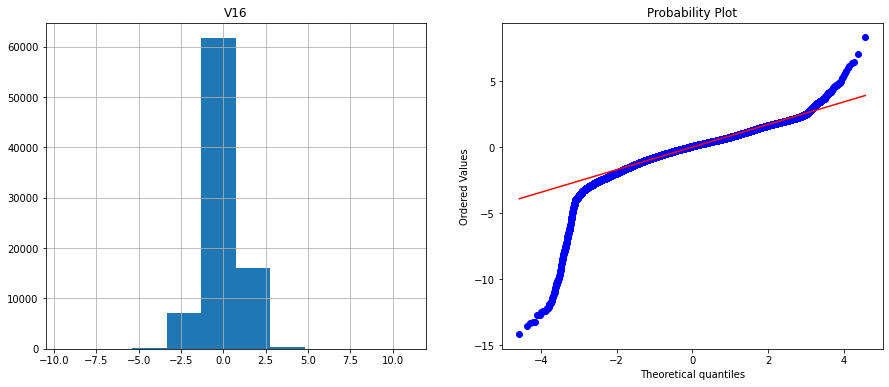

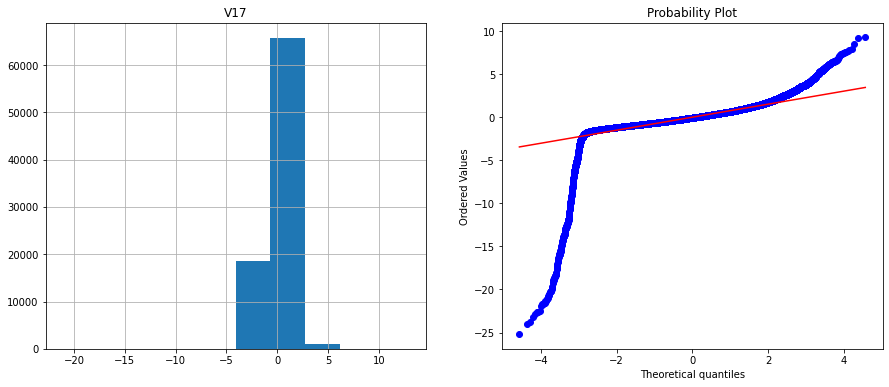

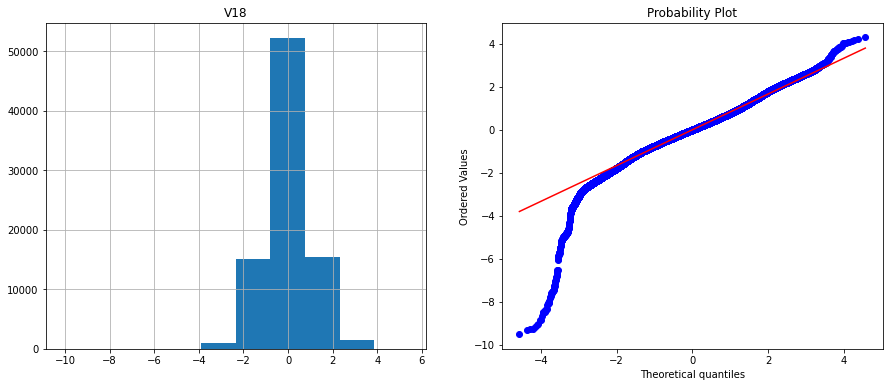

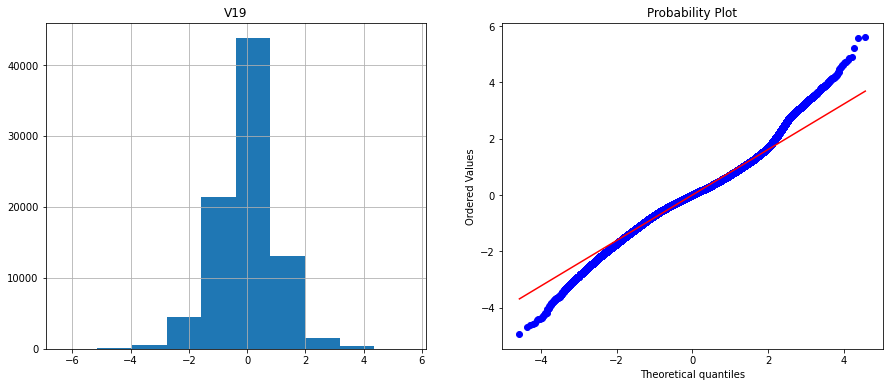

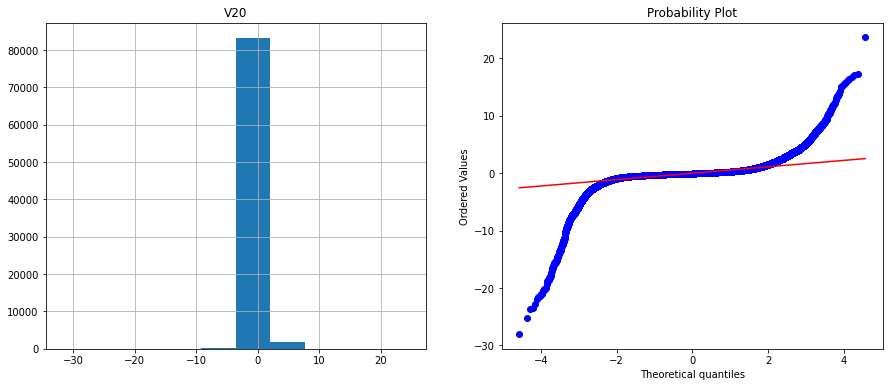

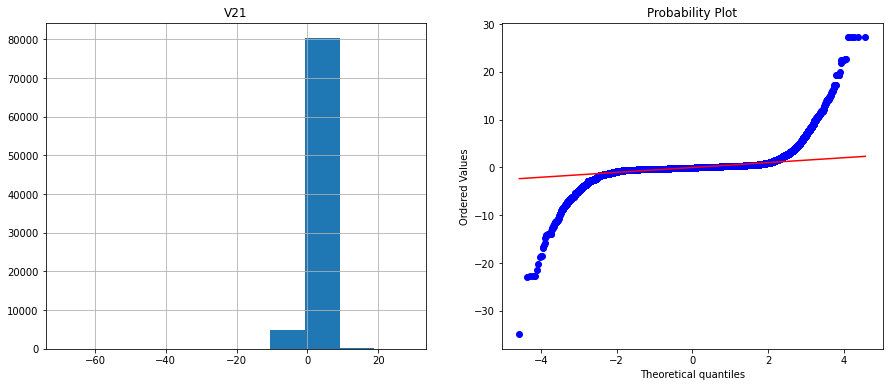

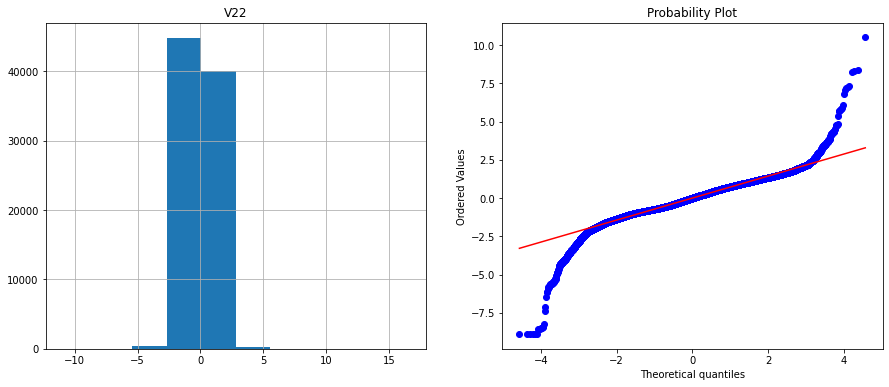

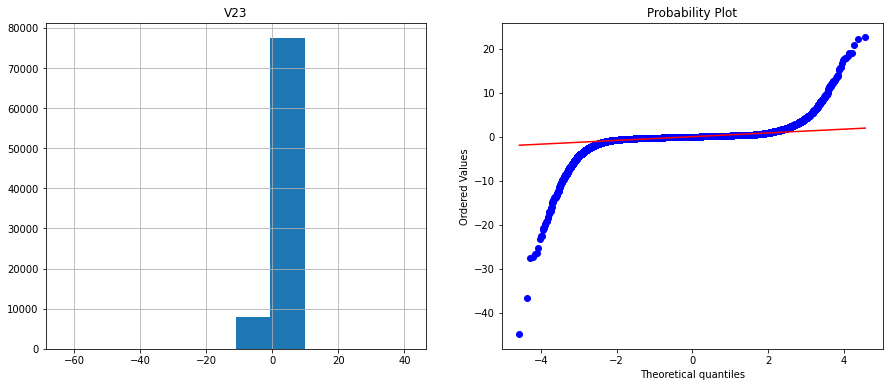

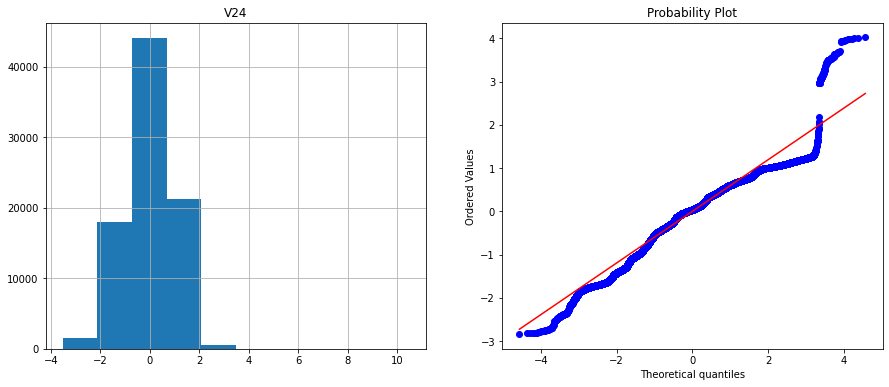

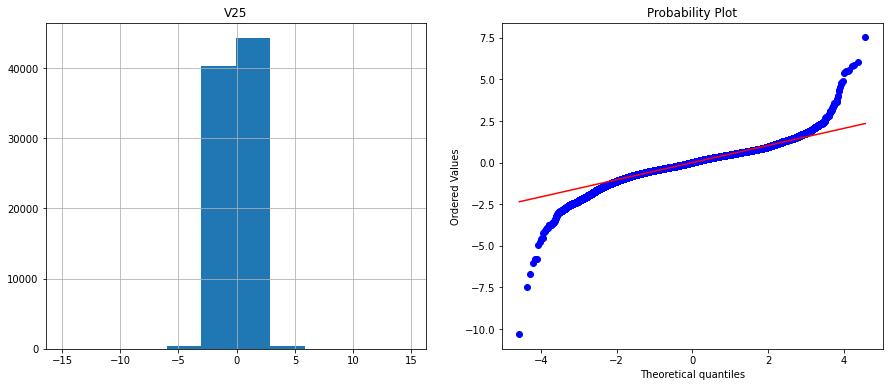

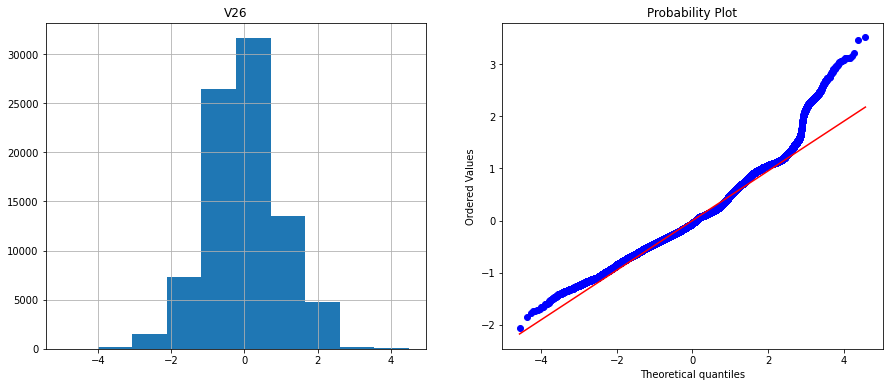

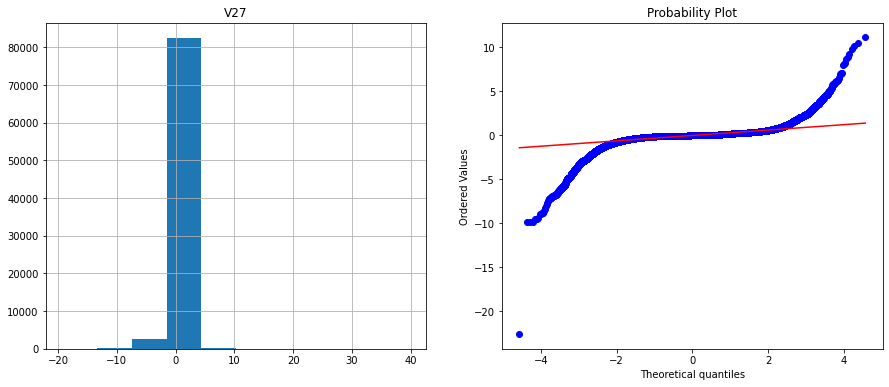

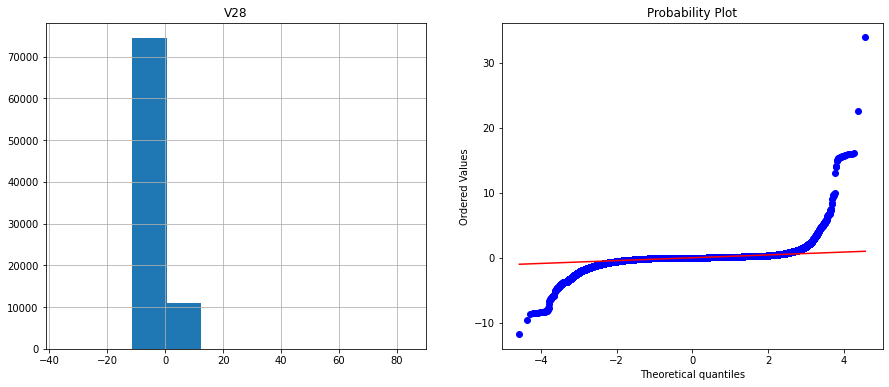

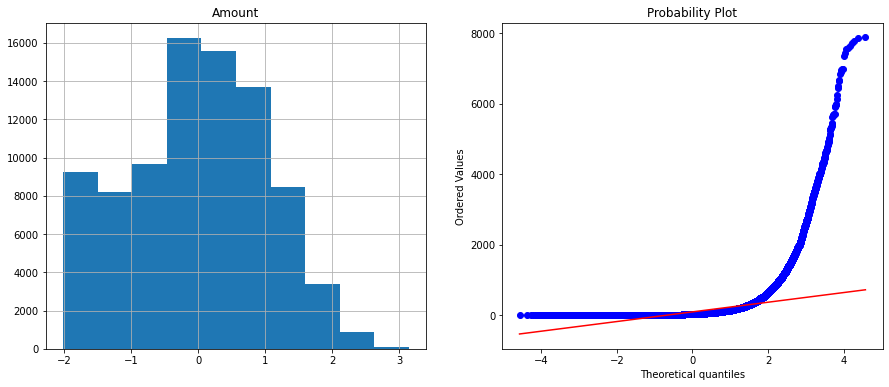

In [68]:
# plot the histogram of a variable from the dataset again to see the result 
for i in df_X_test_pt.columns:
    show_histplot(df_X_test_pt,i)

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
#Function to plot roc_auc graph
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

Building Logistic Regression on Imbalance Data

In [69]:
# Logistic Regression Selecting best parameters
from sklearn import linear_model#import the package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold
#num_C =   #--> list of values
#cv_num =   #--> list of values
X=df_X_train_pt
y=y_train
#Grid Search

In [ ]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
logreg = LogisticRegression()
param = {'C':[0.001,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,5,10],'class_weight' : [{0:0.4,1:0.6},'balanced']}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=folds)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

In [33]:
#checking roc_auc score in stratifiedKFOLD
kf = StratifiedKFold(n_splits=10,shuffle=True)
pred_test_full =0
cv_score =[]
i=1
lr = LogisticRegression(class_weight = {0: 0.4, 1: 0.6},C = 0.03)
for train_index,test_index in kf.split(X,y):
    #print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    
    #model
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    i+=1

ROC AUC score: 0.8142103411888849
ROC AUC score: 0.9285463042058189
ROC AUC score: 0.899899502537561
ROC AUC score: 0.8284960554745993
ROC AUC score: 0.8428068941259232
ROC AUC score: 0.8713783226973518
ROC AUC score: 0.8381599210208178
ROC AUC score: 0.7940422739619942
ROC AUC score: 0.8823026924452511
ROC AUC score: 0.8856389088298635


In [34]:
#printing mean roc_acu score
np.mean(cv_score)

0.8585481216488065

In [35]:
#fitting the data into model
lr.fit(X,y)

LogisticRegression(C=0.03, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# making predictions on the testing set 
y_pred = lr.predict(X_test) 

In [37]:
#printing roc_auc score on test data
score = roc_auc_score(y_test,y_pred)
score

0.8274572412014266

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

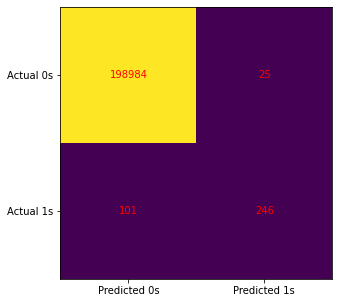

In [39]:
#printing confusion matrix on train data
cm = confusion_matrix(y_train, lr.predict(X))
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

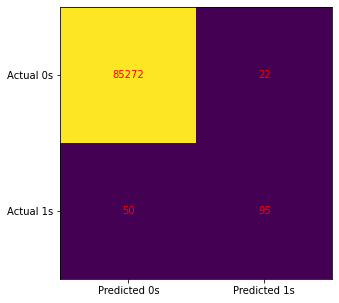

In [40]:
#printing confusion matrix on test data
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [41]:
#printing clasifiction report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.81      0.66      0.73       145

    accuracy                           1.00     85439
   macro avg       0.91      0.83      0.86     85439
weighted avg       1.00      1.00      1.00     85439



Random Forest Model

In [42]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [43]:
# fit model
model.fit(X, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 44.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

In [44]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9449714342255007
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [45]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85285     9]
 [   34   111]]
Sensitivity: 	0.77
Specificity: 	1.0
AUC:    	 0.96


Decision Tree

In [46]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Creating the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)



In [48]:
# Fit the grid search to the data
grid_search.fit(X,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
         

In [49]:
# printing the optimal accuracy score
print("best accuracy", grid_search.best_score_)

best accuracy 0.9992525929982541


In [50]:
#Printing best hyperparameters
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [51]:
#Running the model with best parameters obtained from grid search
clf_gini = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [52]:
clf_gini.fit(X, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
# checking the accuracy score of the model
clf_gini.score(X_test,y_test)

0.9992743360760309

In [73]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

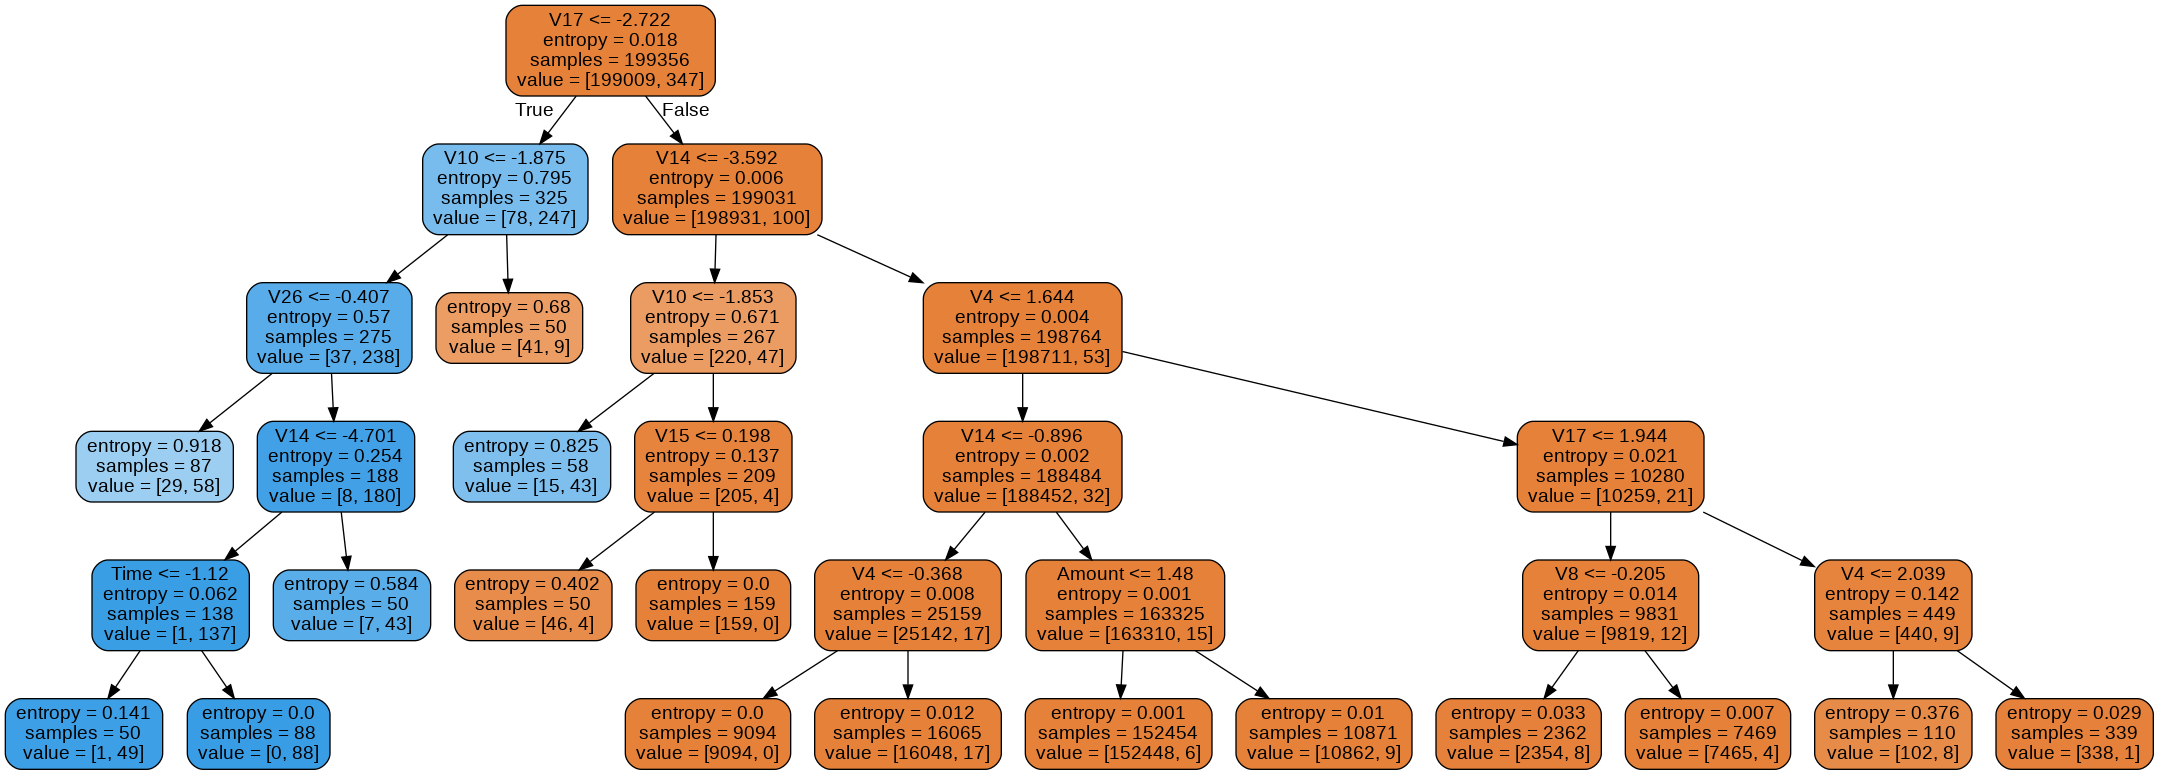

In [55]:
# plotting the tree 
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=X.columns,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [56]:
# checking the classification metrics on test data
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.77      0.81      0.79       145

    accuracy                           1.00     85439
   macro avg       0.89      0.90      0.90     85439
weighted avg       1.00      1.00      1.00     85439



In [57]:
# printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85260    34]
 [   28   117]]


In [58]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85285     9]
 [   34   111]]
Sensitivity: 	0.77
Specificity: 	1.0
AUC:    	 0.96


Using xgboost model

In [72]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

In [60]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.99694705e-01, 3.05320398e-04],
       [9.99005377e-01, 9.94628528e-04],
       [9.99769509e-01, 2.30485617e-04],
       [9.99910355e-01, 8.96572819e-05],
       [9.99958158e-01, 4.18525051e-05],
       [9.99939799e-01, 6.01749052e-05],
       [9.99917448e-01, 8.25288735e-05],
       [9.99839604e-01, 1.60369105e-04],
       [9.97286201e-01, 2.71380832e-03],
       [9.99881625e-01, 1.18375465e-04]], dtype=float32)

In [62]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.77%


In [77]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
              'max_depth': range(5, 15, 5),
              'min_child_weight':[1,3,5,7],
              'gamma' : [0.0,0.1,0.2,0.3],
              'colsample_bytree' : [0.3,0.5,0.7],
              'n_estimators': range(100,200,300)
              }          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [ ]:
# fitting the model
model_cv.fit(X, y_train) 

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [76]:
model_cv.best_params_

AttributeError: ignored

In [66]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,37.957739,0.519081,0.167802,0.006463,0.2,5,100,0.3,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.970334,0.975187,0.937936,0.965065,0.968468,0.963398,0.013145,9,0.999829,0.999951,0.999881,0.999915,0.999966,0.999908,4.958864e-05
1,52.236284,0.601897,0.194453,0.006594,0.2,5,100,0.6,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.976879,0.976151,0.955243,0.968223,0.971891,0.969677,0.007863,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.878796e-08
2,60.384772,1.085951,0.203883,0.003614,0.2,5,100,0.9,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.977573,0.962873,0.964350,0.972483,0.980083,0.971472,0.006885,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,42.089326,0.867458,0.167520,0.003714,0.2,10,100,0.3,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.979613,0.976843,0.944478,0.972229,0.970457,0.968724,0.012551,5,0.999929,0.999975,0.999879,0.999961,0.999977,0.999944,3.693808e-05
4,65.088931,1.769977,0.202906,0.007317,0.2,10,100,0.6,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.978249,0.974411,0.942795,0.967691,0.972178,0.967065,0.012606,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,77.497028,1.705408,0.214789,0.007374,0.2,10,100,0.9,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.973549,0.972399,0.954654,0.974819,0.977662,0.970617,0.008172,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,34.507007,0.977477,0.169200,0.005500,0.6,5,100,0.3,"{'learning_rate': 0.6, 'max_depth': 5, 'n_esti...",0.967240,0.963205,0.959178,0.952057,0.952616,0.958859,0.005907,11,0.999984,0.999997,0.999994,0.999996,0.999992,0.999993,4.678732e-06
7,42.893120,0.434505,0.177586,0.005924,0.6,5,100,0.6,"{'learning_rate': 0.6, 'max_depth': 5, 'n_esti...",0.959325,0.970497,0.954279,0.958679,0.965581,0.961672,0.005697,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,47.711005,0.713937,0.186328,0.005651,0.6,5,100,0.9,"{'learning_rate': 0.6, 'max_depth': 5, 'n_esti...",0.969767,0.959077,0.958401,0.971028,0.988253,0.969305,0.010823,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,35.895229,1.072987,0.170713,0.005185,0.6,10,100,0.3,"{'learning_rate': 0.6, 'max_depth': 10, 'n_est...",0.958850,0.947673,0.943391,0.959593,0.955194,0.952940,0.006375,12,0.999978,0.999994,0.999967,0.999994,0.999999,0.999986,1.217496e-05


In [67]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,37.957739,0.519081,0.167802,0.006463,0.2,5,100,0.3,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.970334,0.975187,0.937936,0.965065,0.968468,0.963398,0.013145,9,0.999829,0.999951,0.999881,0.999915,0.999966,0.999908,4.958864e-05
1,52.236284,0.601897,0.194453,0.006594,0.2,5,100,0.6,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.976879,0.976151,0.955243,0.968223,0.971891,0.969677,0.007863,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.878796e-08
2,60.384772,1.085951,0.203883,0.003614,0.2,5,100,0.9,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.977573,0.962873,0.964350,0.972483,0.980083,0.971472,0.006885,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,42.089326,0.867458,0.167520,0.003714,0.2,10,100,0.3,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.979613,0.976843,0.944478,0.972229,0.970457,0.968724,0.012551,5,0.999929,0.999975,0.999879,0.999961,0.999977,0.999944,3.693808e-05
4,65.088931,1.769977,0.202906,0.007317,0.2,10,100,0.6,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.978249,0.974411,0.942795,0.967691,0.972178,0.967065,0.012606,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [68]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 5, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [149]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85276    18]
 [   33   112]]
Sensitivity: 	0.77
Specificity: 	1.0
AUC:    	 0.99


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model.LogisticRegression as logreg #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#Grid Search
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)